# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import missingno as msno
import datetime
import seaborn as sns
import plotly.express as px

from sklearn import metrics
from sklearn.metrics import matthews_corrcoef

from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn import svm

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

from collections import Counter

from scipy.stats import pearsonr

In [2]:
from aux_functions import *

In [3]:
warnings.filterwarnings("ignore")

# Loading Data

In [4]:

data = pd.read_csv("Datasets/X-IIoTID_dataset.csv")
print("Data has {} rows & {} columns".format(data.shape[0], data.shape[1]))

data.columns

Data has 820834 rows & 68 columns


Index(['Date', 'Timestamp', 'Scr_IP', 'Scr_port', 'Des_IP', 'Des_port',
       'Protocol', 'Service', 'Duration', 'Scr_bytes', 'Des_bytes',
       'Conn_state', 'missed_bytes', 'is_syn_only', 'Is_SYN_ACK',
       'is_pure_ack', 'is_with_payload', 'FIN or RST', 'Bad_checksum',
       'is_SYN_with_RST', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts',
       'Des_ip_bytes', 'anomaly_alert', 'total_bytes', 'total_packet',
       'paket_rate', 'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio',
       'Scr_bytes_ratio', 'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time',
       'Avg_nice_time', 'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'OSSEC_alert_level', 'Lo

In [5]:
data.head()

,Date,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,...,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,class1,class2,class3
0,9/01/2020,1578540956,192.168.2.199,49278,192.168.2.10,80,tcp,http,0.67369,13437,...,5,0,0,0,0,0,0,Scanning_vulnerability,Reconnaissance,Attack
1,13/01/2020,1578871873,10.0.1.5,39769,131.236.3.92,53,udp,dns,0.000083,78,...,0,0,0,0,0,0,0,Normal,Normal,Normal
2,9/01/2020,1578522486,172.24.1.80,59050,172.24.1.1,53,udp,dns,0.000132,38,...,0,0,0,0,0,0,0,Normal,Normal,Normal
3,27/02/2020,1582757640,192.168.2.196,37966,192.168.2.10,1880,tcp,websocket,9.378481,1121,...,0,1,1,1,1,1,1,Normal,Normal,Normal
4,16/12/2019,1576452612,172.24.1.80,38233,172.24.1.1,53,udp,dns,0.000074,-,...,0,0,0,0,0,0,0,Normal,Normal,Normal


In [6]:
data.replace('-', np.NaN, inplace=True)
data.replace('?', np.NaN, inplace=True)

# Pre-Processing

## Drop and replace 

Drop Columns ['Date' , 'Scr_IP' , 'Des_IP' , 'Scr_port', 'Des_port' , 'Timestamp']

In [7]:
data = data.drop(columns = ['Date' , 'Scr_IP' , 'Des_IP' , 'Scr_port', 'Des_port' , 'Timestamp'])
data.columns

Index(['Protocol', 'Service', 'Duration', 'Scr_bytes', 'Des_bytes',
       'Conn_state', 'missed_bytes', 'is_syn_only', 'Is_SYN_ACK',
       'is_pure_ack', 'is_with_payload', 'FIN or RST', 'Bad_checksum',
       'is_SYN_with_RST', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts',
       'Des_ip_bytes', 'anomaly_alert', 'total_bytes', 'total_packet',
       'paket_rate', 'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio',
       'Scr_bytes_ratio', 'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time',
       'Avg_nice_time', 'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'OSSEC_alert_level', 'Login_attempt',
       'Succesful_login', 'File_activity', 'Process_activi

Replace 'FALSE' for False and 'TRUE' for True in dataset

In [8]:
data['anomaly_alert'].unique()

array(['TRUE', 'FALSE', nan, False, True], dtype=object)

In [9]:
data.replace('TRUE', True, inplace=True)
data.replace('FALSE', True, inplace=True)

In [10]:
data['anomaly_alert'].unique()

array([True, nan, False], dtype=object)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820834 entries, 0 to 820833
Data columns (total 62 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Protocol                     820680 non-null  object
 1   Service                      820834 non-null  object
 2   Duration                     745073 non-null  object
 3   Scr_bytes                    596963 non-null  object
 4   Des_bytes                    596963 non-null  object
 5   Conn_state                   820834 non-null  int64 
 6   missed_bytes                 820680 non-null  object
 7   is_syn_only                  820834 non-null  bool  
 8   Is_SYN_ACK                   820834 non-null  bool  
 9   is_pure_ack                  820834 non-null  bool  
 10  is_with_payload              820834 non-null  bool  
 11  FIN or RST                   820834 non-null  bool  
 12  Bad_checksum                 820834 non-null  bool  
 13  is_SYN_with_RS

Encode categorical features 'Protocol' and Service

In [12]:
categorical_features = data[ ["Protocol", "Service", 'Conn_state', 'is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload', 'FIN or RST',
                        'Bad_checksum', 'is_SYN_with_RST' , 'OSSEC_alert', 'Login_attempt', 'Succesful_login', 'File_activity',
                        'Process_activity', 'read_write_physical.process', 'is_privileged' , 'OSSEC_alert_level'] ]

for col in categorical_features.columns:
    print(f'{col}: {categorical_features[col].unique()}\n')

Protocol: ['tcp' 'udp' 'icmp' nan]

Service: ['http' 'dns' 'websocket' 'coap' 'other' 'mqtt' 'https' 'ssh' 'smtp'
 'modbus' 'private' 'netbios-ns' 'simple_service_discovery' 'echo' 'imap'
 'mysql' 'dhcp']

Conn_state: [1 0]

is_syn_only: [ True False]

Is_SYN_ACK: [ True False]

is_pure_ack: [ True False]

is_with_payload: [ True False]

FIN or RST: [ True False]

Bad_checksum: [False]

is_SYN_with_RST: [False]

OSSEC_alert: [1 0]

Login_attempt: [0 1]

Succesful_login: [0 1]

File_activity: [0 1]

Process_activity: [0 1]

read_write_physical.process: [0 1]

is_privileged: [0 1]

OSSEC_alert_level: [ 5  0  3 10  6  4]



In [13]:
numerical_features = data.columns.drop(categorical_features)
numerical_features = numerical_features.drop('class1')
numerical_features = numerical_features.drop('class2')
numerical_features = numerical_features.drop('class3')
numerical_features

Index(['Duration', 'Scr_bytes', 'Des_bytes', 'missed_bytes', 'Scr_pkts',
       'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes', 'anomaly_alert',
       'total_bytes', 'total_packet', 'paket_rate', 'byte_rate',
       'Scr_packts_ratio', 'Des_pkts_ratio', 'Scr_bytes_ratio',
       'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time',
       'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s'],
      dtype='object')

In [14]:
data = pd.get_dummies(data, columns = ['Protocol', 'Service', 'OSSEC_alert_level'])
data

,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,...,Service_simple_service_discovery,Service_smtp,Service_ssh,Service_websocket,OSSEC_alert_level_0,OSSEC_alert_level_3,OSSEC_alert_level_4,OSSEC_alert_level_5,OSSEC_alert_level_6,OSSEC_alert_level_10
0,0.67369,13437,34924,1,0,True,True,True,True,True,...,False,False,False,False,False,False,False,True,False,False
1,0.000083,78,0,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.000132,38,38,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,9.378481,1121,484,1,0,True,True,True,True,True,...,False,False,False,True,True,False,False,False,False,False
4,0.000074,NaN,NaN,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820829,NaN,NaN,NaN,0,0,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
820830,63.290477,0,0,1,0,True,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
820831,14.787547,26091,604398,0,0,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
820832,0.000011,0,0,0,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [15]:
data = data.drop(columns = ['Bad_checksum', 'is_SYN_with_RST'])
data

,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,...,Service_simple_service_discovery,Service_smtp,Service_ssh,Service_websocket,OSSEC_alert_level_0,OSSEC_alert_level_3,OSSEC_alert_level_4,OSSEC_alert_level_5,OSSEC_alert_level_6,OSSEC_alert_level_10
0,0.67369,13437,34924,1,0,True,True,True,True,True,...,False,False,False,False,False,False,False,True,False,False
1,0.000083,78,0,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.000132,38,38,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,9.378481,1121,484,1,0,True,True,True,True,True,...,False,False,False,True,True,False,False,False,False,False
4,0.000074,NaN,NaN,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820829,NaN,NaN,NaN,0,0,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
820830,63.290477,0,0,1,0,True,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
820831,14.787547,26091,604398,0,0,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
820832,0.000011,0,0,0,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


Remove rows with values : \
"excel" in column "Scr_ip_bytes" \
"aza" and  ' ' in column Avg_user_time

In [16]:
print(data["Scr_ip_bytes"].value_counts()['excel'])

1


In [17]:
mask = data['Scr_ip_bytes'] == 'excel'
data = data[~mask]
data

,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,...,Service_simple_service_discovery,Service_smtp,Service_ssh,Service_websocket,OSSEC_alert_level_0,OSSEC_alert_level_3,OSSEC_alert_level_4,OSSEC_alert_level_5,OSSEC_alert_level_6,OSSEC_alert_level_10
0,0.67369,13437,34924,1,0,True,True,True,True,True,...,False,False,False,False,False,False,False,True,False,False
1,0.000083,78,0,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.000132,38,38,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,9.378481,1121,484,1,0,True,True,True,True,True,...,False,False,False,True,True,False,False,False,False,False
4,0.000074,NaN,NaN,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820829,NaN,NaN,NaN,0,0,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
820830,63.290477,0,0,1,0,True,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
820831,14.787547,26091,604398,0,0,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
820832,0.000011,0,0,0,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [18]:
print(data["Avg_user_time"].value_counts()['aza'])
print(data["Avg_user_time"].value_counts()[' '])

18
1


In [19]:
mask = data['Avg_user_time'] == 'aza'
data = data[~mask]
mask = data['Avg_user_time'] == ' '
data = data[~mask]
data

,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,...,Service_simple_service_discovery,Service_smtp,Service_ssh,Service_websocket,OSSEC_alert_level_0,OSSEC_alert_level_3,OSSEC_alert_level_4,OSSEC_alert_level_5,OSSEC_alert_level_6,OSSEC_alert_level_10
0,0.67369,13437,34924,1,0,True,True,True,True,True,...,False,False,False,False,False,False,False,True,False,False
1,0.000083,78,0,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.000132,38,38,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,9.378481,1121,484,1,0,True,True,True,True,True,...,False,False,False,True,True,False,False,False,False,False
4,0.000074,NaN,NaN,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820829,NaN,NaN,NaN,0,0,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
820830,63.290477,0,0,1,0,True,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
820831,14.787547,26091,604398,0,0,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
820832,0.000011,0,0,0,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


Replace with -1 values of "#DIV/0!" in columns "Avg_kbmemused" and "Std_kbmemused"

In [20]:
print(data["Avg_kbmemused"].value_counts()['#DIV/0!'])
print(data["Std_kbmemused"].value_counts()['#DIV/0!'])

630
630


In [21]:
mask = data['Avg_kbmemused'] == '#DIV/0!'
data = data[~mask]
mask = data['Std_kbmemused'] == '#DIV/0!'
data = data[~mask]
data

,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,...,Service_simple_service_discovery,Service_smtp,Service_ssh,Service_websocket,OSSEC_alert_level_0,OSSEC_alert_level_3,OSSEC_alert_level_4,OSSEC_alert_level_5,OSSEC_alert_level_6,OSSEC_alert_level_10
0,0.67369,13437,34924,1,0,True,True,True,True,True,...,False,False,False,False,False,False,False,True,False,False
1,0.000083,78,0,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.000132,38,38,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,9.378481,1121,484,1,0,True,True,True,True,True,...,False,False,False,True,True,False,False,False,False,False
4,0.000074,NaN,NaN,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820829,NaN,NaN,NaN,0,0,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
820830,63.290477,0,0,1,0,True,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
820831,14.787547,26091,604398,0,0,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
820832,0.000011,0,0,0,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


Verifie number os attacks

In [22]:
data["class1"].value_counts()

class1
Normal                            420825
RDOS                              141261
Scanning_vulnerability             52852
Generic_scanning                   50277
BruteForce                         47241
MQTT_cloud_broker_subscription     23524
Discovering_resources              23148
Exfiltration                       22134
insider_malcious                   17443
Modbus_register_reading             5953
False_data_injection                5094
C&C                                 2809
Dictionary                          2572
TCP Relay                           2119
fuzzing                             1313
Reverse_shell                       1016
crypto-ransomware                    458
MitM                                 117
Fake_notification                     28
Name: count, dtype: int64

Remove Fake_notification and MitM

In [23]:
data = data[data.class1 != 'MitM']
data = data[data.class1 != 'Fake_notification']
data["class1"].value_counts()

class1
Normal                            420825
RDOS                              141261
Scanning_vulnerability             52852
Generic_scanning                   50277
BruteForce                         47241
MQTT_cloud_broker_subscription     23524
Discovering_resources              23148
Exfiltration                       22134
insider_malcious                   17443
Modbus_register_reading             5953
False_data_injection                5094
C&C                                 2809
Dictionary                          2572
TCP Relay                           2119
fuzzing                             1313
Reverse_shell                       1016
crypto-ransomware                    458
Name: count, dtype: int64

Save target classes

In [24]:
class3_target = data["class3"].replace({"Normal" : 0, "Attack" : 1 })

In [25]:
class2_target = data["class2"].replace({"Normal" : 0 , "RDOS" : 1 , "Reconnaissance" : 2,  "Weaponization" : 3 , "Lateral _movement" : 4 , "Exfiltration" : 5,
                        "Tampering" : 6 , "C&C" : 7, "Exploitation" : 8 , "crypto-ransomware" : 9})

In [26]:
class1_target = data["class1"].replace({"Normal" : 0 , "RDOS" : 1 , "Scanning_vulnerability" : 2 , "Generic_scanning" : 3 , "BruteForce" : 4 , 
                        "MQTT_cloud_broker_subscription" : 5 , "Discovering_resources" : 6 , "Exfiltration" : 7 ,"insider_malcious" : 8 ,
                        "Modbus_register_reading" : 9 , "False_data_injection": 10 , "C&C" : 11 , "Dictionary" : 12,  "TCP Relay" : 13 ,
                        "fuzzing" : 14 , "Reverse_shell" : 15 , "crypto-ransomware" : 16 
                        })

In [27]:
class1_target.unique()

array([ 2,  0,  1,  3,  4,  6,  5,  7,  8, 12,  9, 15, 10, 14, 13, 11, 16],
      dtype=int64)

Replace missing values

In [28]:
column_missings = data.columns[data.isnull().any()]
print(column_missings)

numerical_features

for col in numerical_features:
    print(data[col].dtypes)

for col in column_missings:
    #print(data[col].mean())
    data[col].fillna(int(data[col].mean()), inplace=True)
data

column_missings2 = data.columns[data.isnull().any()]
print(column_missings2)

## Split Data

In [29]:
data = data.drop(columns=["class1", "class2", "class3"])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data, class1_target,
                                                    stratify=class1_target, 
                                                    test_size=0.2)

In [31]:
X_train.columns

Index(['Duration', 'Scr_bytes', 'Des_bytes', 'Conn_state', 'missed_bytes',
       'is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload',
       'FIN or RST', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes',
       'anomaly_alert', 'total_bytes', 'total_packet', 'paket_rate',
       'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio', 'Scr_bytes_ratio',
       'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time',
       'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'Login_attempt', 'Succesful_login',
       'File_activity', 'Process_activity', 'read_write_physical.process',
       'is_privileged', 'Protocol_icmp', 'Protocol

In [32]:
y_train.unique()

array([ 0,  3,  6,  2,  1,  4, 14,  5,  7,  8, 11, 12, 10, 13,  9, 16, 15],
      dtype=int64)

In [33]:
y_test.value_counts()

class1
0     84165
1     28252
2     10570
3     10055
4      9448
5      4705
6      4630
7      4427
8      3489
9      1191
10     1019
11      562
12      514
13      424
14      263
15      203
16       91
Name: count, dtype: int64

In [34]:
X_test.columns

Index(['Duration', 'Scr_bytes', 'Des_bytes', 'Conn_state', 'missed_bytes',
       'is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload',
       'FIN or RST', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes',
       'anomaly_alert', 'total_bytes', 'total_packet', 'paket_rate',
       'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio', 'Scr_bytes_ratio',
       'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time',
       'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'Login_attempt', 'Succesful_login',
       'File_activity', 'Process_activity', 'read_write_physical.process',
       'is_privileged', 'Protocol_icmp', 'Protocol

## Normalization

In [35]:
X_train

,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,...,Service_simple_service_discovery,Service_smtp,Service_ssh,Service_websocket,OSSEC_alert_level_0,OSSEC_alert_level_3,OSSEC_alert_level_4,OSSEC_alert_level_5,OSSEC_alert_level_6,OSSEC_alert_level_10
75183,7.394641,1003,886,1,0,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
21493,0.000571,-1,-1,0,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
343087,0.000306,37,37,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
665649,0.051699,27,102,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
148159,0.157739,-1,-1,1,0,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483486,-1,-1,-1,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
268256,0.000385,37,37,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
358797,0.000033,0,0,0,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
449125,0.000307,156,156,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [36]:
X_train.head()

,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,...,Service_simple_service_discovery,Service_smtp,Service_ssh,Service_websocket,OSSEC_alert_level_0,OSSEC_alert_level_3,OSSEC_alert_level_4,OSSEC_alert_level_5,OSSEC_alert_level_6,OSSEC_alert_level_10
75183,7.394641,1003,886,1,0,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
21493,0.000571,-1,-1,0,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
343087,0.000306,37,37,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
665649,0.051699,27,102,1,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
148159,0.157739,-1,-1,1,0,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False


In [37]:
col_names = list(X_train.columns)
features = X_train[col_names]

ct = ColumnTransformer([
        ('somename', StandardScaler(), numerical_features)
    ], remainder='passthrough')

X_train = pd.DataFrame(ct.fit_transform(features))
X_train

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.012165,-0.066004,-0.143478,-0.009005,-0.042324,-0.060421,-0.083018,-0.145283,-1.993103,-0.145257,...,False,False,False,False,True,False,False,False,False,False
1,-0.077424,-0.197895,-0.146641,-0.009005,-0.075225,-0.128508,-0.109715,-0.149196,0.500503,-0.152787,...,False,False,False,False,True,False,False,False,False,False
2,-0.077426,-0.192903,-0.146506,-0.009005,-0.067913,-0.125145,-0.102087,-0.14897,-1.993103,-0.152433,...,False,False,False,False,True,False,False,False,False,False
3,-0.076973,-0.194217,-0.146274,-0.009005,-0.064258,-0.124227,-0.098273,-0.14865,0.500503,-0.152147,...,False,False,False,False,True,False,False,False,False,False
4,-0.076037,-0.197895,-0.146641,-0.009005,-0.075225,-0.128508,-0.109715,-0.149196,0.500503,-0.152787,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656026,-0.086255,-0.197895,-0.146641,-0.009005,-0.067913,-0.098389,-0.105901,-0.149193,-1.993103,-0.152787,...,False,False,False,False,True,False,False,False,False,False
656027,-0.077426,-0.192903,-0.146506,-0.009005,-0.067913,-0.125145,-0.102087,-0.14897,0.500503,-0.152433,...,False,False,False,False,True,False,False,False,False,False
656028,-0.077429,-0.197764,-0.146638,-0.009005,-0.067913,-0.125399,-0.102087,-0.149056,0.500503,-0.152613,...,False,False,False,False,True,False,False,False,False,False
656029,-0.077426,-0.177271,-0.146081,-0.009005,-0.056947,-0.114799,-0.090645,-0.148272,-1.993103,-0.151322,...,False,False,False,False,True,False,False,False,False,False


In [38]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.012165,-0.066004,-0.143478,-0.009005,-0.042324,-0.060421,-0.083018,-0.145283,-1.993103,-0.145257,...,False,False,False,False,True,False,False,False,False,False
1,-0.077424,-0.197895,-0.146641,-0.009005,-0.075225,-0.128508,-0.109715,-0.149196,0.500503,-0.152787,...,False,False,False,False,True,False,False,False,False,False
2,-0.077426,-0.192903,-0.146506,-0.009005,-0.067913,-0.125145,-0.102087,-0.14897,-1.993103,-0.152433,...,False,False,False,False,True,False,False,False,False,False
3,-0.076973,-0.194217,-0.146274,-0.009005,-0.064258,-0.124227,-0.098273,-0.14865,0.500503,-0.152147,...,False,False,False,False,True,False,False,False,False,False
4,-0.076037,-0.197895,-0.146641,-0.009005,-0.075225,-0.128508,-0.109715,-0.149196,0.500503,-0.152787,...,False,False,False,False,True,False,False,False,False,False


In [39]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.012165,-0.066004,-0.143478,-0.009005,-0.042324,-0.060421,-0.083018,-0.145283,-1.993103,-0.145257,...,False,False,False,False,True,False,False,False,False,False
1,-0.077424,-0.197895,-0.146641,-0.009005,-0.075225,-0.128508,-0.109715,-0.149196,0.500503,-0.152787,...,False,False,False,False,True,False,False,False,False,False
2,-0.077426,-0.192903,-0.146506,-0.009005,-0.067913,-0.125145,-0.102087,-0.14897,-1.993103,-0.152433,...,False,False,False,False,True,False,False,False,False,False
3,-0.076973,-0.194217,-0.146274,-0.009005,-0.064258,-0.124227,-0.098273,-0.14865,0.500503,-0.152147,...,False,False,False,False,True,False,False,False,False,False
4,-0.076037,-0.197895,-0.146641,-0.009005,-0.075225,-0.128508,-0.109715,-0.149196,0.500503,-0.152787,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656026,-0.086255,-0.197895,-0.146641,-0.009005,-0.067913,-0.098389,-0.105901,-0.149193,-1.993103,-0.152787,...,False,False,False,False,True,False,False,False,False,False
656027,-0.077426,-0.192903,-0.146506,-0.009005,-0.067913,-0.125145,-0.102087,-0.14897,0.500503,-0.152433,...,False,False,False,False,True,False,False,False,False,False
656028,-0.077429,-0.197764,-0.146638,-0.009005,-0.067913,-0.125399,-0.102087,-0.149056,0.500503,-0.152613,...,False,False,False,False,True,False,False,False,False,False
656029,-0.077426,-0.177271,-0.146081,-0.009005,-0.056947,-0.114799,-0.090645,-0.148272,-1.993103,-0.151322,...,False,False,False,False,True,False,False,False,False,False


In [40]:
col_names = list(X_test.columns)
features = X_test[col_names]

X_test = pd.DataFrame(ct.transform(features))
X_test

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.558114,0.023719,-0.146381,-0.009005,-0.060602,-0.038252,-0.102087,-0.148849,0.500503,-0.146524,...,False,False,False,False,True,False,False,False,False,False
1,-0.077429,-0.197895,-0.146641,-0.009005,-0.075225,-0.128508,-0.109715,-0.149196,0.500503,-0.152787,...,False,False,False,False,True,False,False,False,False,False
2,-0.077427,-0.192903,-0.146506,-0.009005,-0.067913,-0.125145,-0.102087,-0.14897,0.500503,-0.152433,...,False,False,False,False,True,False,False,False,False,False
3,-0.077429,-0.197764,-0.146638,-0.009005,-0.067913,-0.126215,-0.102087,-0.149056,-1.993103,-0.15264,...,False,False,False,False,True,False,False,False,False,False
4,-0.077429,-0.197895,-0.146641,-0.009005,-0.075225,-0.128508,-0.109715,-0.149196,0.500503,-0.152787,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164003,-0.077428,-0.192903,-0.146506,-0.009005,-0.067913,-0.125145,-0.102087,-0.14897,-1.993103,-0.152433,...,False,False,False,False,True,False,False,False,False,False
164004,-0.077426,-0.191852,-0.146477,-0.009005,-0.067913,-0.124737,-0.102087,-0.148942,0.500503,-0.152378,...,False,False,False,False,True,False,False,False,False,False
164005,-0.077382,-0.197895,-0.146641,-0.009005,-0.075225,-0.128508,-0.109715,-0.149196,0.500503,-0.152787,...,False,False,False,False,True,False,False,False,False,False
164006,-0.077427,-0.177271,-0.146081,-0.009005,-0.056947,-0.114799,-0.090645,-0.148272,0.500503,-0.151322,...,False,False,False,False,True,False,False,False,False,False


# PCA

In [41]:
pca = PCA(random_state=0)
pca.fit(X_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [42]:
pca = PCA(n_components=80, random_state=0)
pca.fit(X_train)

X_train = pd.DataFrame(pca.transform(X_train))
X_test = pd.DataFrame(pca.transform(X_test))

X_train

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1.162588,-0.267535,-0.935069,-0.485496,-0.021136,-0.558477,0.860684,-1.073270,0.445620,-0.374392,...,-0.000831,-0.001379,-0.000028,-0.002674,4.432510e-07,-0.000043,-1.423991e-15,-2.867017e-15,-6.486828e-16,1.106921e-17
1,2.348149,-1.865301,-0.258296,3.284662,0.360016,0.416977,-0.732114,0.931080,0.546190,-0.248932,...,0.000706,-0.000040,0.000013,0.000591,-2.694817e-06,0.000001,-5.083112e-15,4.081410e-16,2.950068e-16,4.229423e-17
2,1.471612,-0.913320,-1.226604,-1.103591,-0.084425,0.218893,0.248355,0.104404,0.516493,1.021163,...,0.001043,0.000002,-0.000012,0.000180,-2.102220e-05,-0.000004,-4.732271e-15,-2.441150e-16,1.354122e-16,6.608695e-19
3,0.833434,-0.501683,-0.739909,-1.113645,0.501048,0.002885,-0.104300,-0.287439,0.695447,-0.197517,...,0.001104,-0.000299,-0.000016,0.000196,-9.916950e-06,-0.000023,-6.505714e-15,1.004886e-15,7.599127e-16,3.882479e-17
4,-3.853771,0.119552,-1.830805,3.751986,0.565774,-0.644039,-0.270452,0.209897,-0.096216,0.134938,...,0.002353,0.000318,-0.000013,-0.001446,5.734917e-05,-0.000024,-2.804763e-14,-2.936406e-15,-1.980950e-15,1.047443e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656026,-4.696930,0.467114,-2.528994,1.097323,0.768399,-0.295279,-0.431935,0.323788,-0.023324,-0.138555,...,0.001353,-0.000325,0.000014,0.000182,-5.508091e-06,-0.000045,-4.113340e-15,5.052856e-16,-2.878603e-16,-1.321692e-17
656027,1.688313,-1.022245,-1.431131,-1.093546,0.084290,0.436803,-0.420608,-0.062258,0.899794,0.314436,...,0.000253,0.000159,-0.000003,0.000150,-1.423768e-06,-0.000009,-5.197963e-15,-4.384040e-16,-1.837769e-16,-2.362526e-17
656028,0.866047,-0.466708,-0.017890,-0.920278,0.926939,-0.204503,0.280117,-0.450799,-0.258270,0.145184,...,-0.000213,-0.000183,-0.000003,0.000180,-2.761579e-06,-0.000005,-6.139233e-15,3.248743e-16,-4.543938e-16,-1.321692e-17
656029,2.330286,-1.228982,-1.057828,-1.147099,2.000979,0.137128,-0.396467,0.154783,0.834163,0.223490,...,-0.001376,-0.000181,0.000004,-0.000356,-1.080598e-05,-0.000004,-5.200077e-15,-4.939152e-16,3.573245e-18,-2.362526e-17


# Models

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay 

In [47]:
def eval_metrics(model, x , y, labels, title):
  yhat = (model.predict(x))
  accuracy = metrics.accuracy_score(y, yhat)
  confusion_matrix = metrics.confusion_matrix(y, yhat)
  classification = metrics.classification_report(y, yhat, output_dict=True)
  matcor = matthews_corrcoef(y, yhat)
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = labels) 
  fig, ax = plt.subplots(figsize=(16,8))
  ax.set_title(title); 
  # Then just plot it: 
  disp.plot(xticks_rotation  = 90, ax=ax, cmap=plt.cm.Greens) 
  # And show it: 
  plt.show()
  sns.heatmap(pd.DataFrame(classification).iloc[:-1, :].T, annot=True)
  print()
  print("Classification report:" "\n", classification)
  print()
  print("MCC:", matcor)
  print()
  return(classification)


1. Split your dataset into training and test subsets. 
2. Perform a GridSearchCV on your training dataset. 
3. Evaluate your best model (from the GridSearchCV) on your test subset.


## Binary Classification

In [70]:
y_train.value_counts()

class1
0     336660
1     113009
2      42282
3      40222
4      37793
5      18819
6      18518
7      17707
8      13954
9       4762
10      4075
11      2247
12      2058
13      1695
14      1050
15       813
16       367
Name: count, dtype: int64

In [53]:
type(y_train)

pandas.core.series.Series

In [43]:
class3_target = y_train.copy(deep=True)

In [44]:
print(class3_target)

75183     0
21493     3
343087    0
665649    0
148159    0
         ..
483486    1
268256    0
358797    2
449125    0
282223    0
Name: class1, Length: 656031, dtype: int64


In [45]:
class3_target = class3_target.replace({2:1 , 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1})

In [46]:
print(class3_target)

75183     0
21493     1
343087    0
665649    0
148159    0
         ..
483486    1
268256    0
358797    1
449125    0
282223    0
Name: class1, Length: 656031, dtype: int64


In [47]:
class3_target.value_counts()

class1
0    336660
1    319371
Name: count, dtype: int64

In [48]:
class3_test = y_test.copy(deep=True)
class3_test = y_test.replace({2:1 , 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1})
class3_test.value_counts()

class1
0    84165
1    79843
Name: count, dtype: int64

### DT

In [49]:
dt=DecisionTreeClassifier()

parameter_grid = {'max_depth': [20,30,40,50],
                 'criterion':['entropy'],
                 }

grid_search = GridSearchCV(dt, param_grid = parameter_grid, 
                          cv =5, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...criterion=entropy, max_depth=20;, score=0.988 total time= 4.2min
[CV 2/5] END ...criterion=entropy, max_depth=20;, score=0.987 total time= 6.5min
[CV 3/5] END ...criterion=entropy, max_depth=20;, score=0.988 total time= 4.7min
[CV 4/5] END ...criterion=entropy, max_depth=20;, score=0.987 total time= 3.2min
[CV 5/5] END ...criterion=entropy, max_depth=20;, score=0.988 total time= 3.2min
[CV 1/5] END ...criterion=entropy, max_depth=30;, score=0.989 total time= 3.3min
[CV 2/5] END ...criterion=entropy, max_depth=30;, score=0.988 total time= 3.3min
[CV 3/5] END ...criterion=entropy, max_depth=30;, score=0.989 total time= 5.7min
[CV 4/5] END ...criterion=entropy, max_depth=30;, score=0.989 total time= 4.9min
[CV 5/5] END ...criterion=entropy, max_depth=30;, score=0.989 total time= 4.8min
[CV 1/5] END ...criterion=entropy, max_depth=40;, score=0.989 total time= 4.8min
[CV 2/5] END ...criterion=entropy, max_depth=40;,

In [39]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)
dt.fit(X_train, class3_target)

eval_metrics(dt, X_train , class3_target)
eval_metrics(dt, X_test , class3_test)


Model Accuracy:
 0.9999009193163128

Confusion matrix:
 [[336640     20]
 [    45 319326]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    336660
           1       1.00      1.00      1.00    319371

    accuracy                           1.00    656031
   macro avg       1.00      1.00      1.00    656031
weighted avg       1.00      1.00      1.00    656031


MCC: 0.9998017034172795


Model Accuracy:
 0.9693978342519877

Confusion matrix:
 [[81449  2716]
 [ 2303 77540]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     84165
           1       0.97      0.97      0.97     79843

    accuracy                           0.97    164008
   macro avg       0.97      0.97      0.97    164008
weighted avg       0.97      0.97      0.97    164008


MCC: 0.9387731883112146




Model Accuracy:
 0.9688429832691088

Confusion matrix:
 [[81412  2753]
 [ 2357 77486]]

Classification report:
 {'0': {'precision': 0.9718630997146916, 'recall': 0.9672904413948791, 'f1-score': 0.9695713792323176, 'support': 84165.0}, '1': {'precision': 0.965690001121649, 'recall': 0.9704795661485666, 'f1-score': 0.9680788595844628, 'support': 79843.0}, 'accuracy': 0.9688429832691088, 'macro avg': {'precision': 0.9687765504181703, 'recall': 0.9688850037717228, 'f1-score': 0.9688251194083902, 'support': 164008.0}, 'weighted avg': {'precision': 0.9688578883166847, 'recall': 0.9688429832691088, 'f1-score': 0.9688447851256662, 'support': 164008.0}}

MCC: 0.9376615479178381



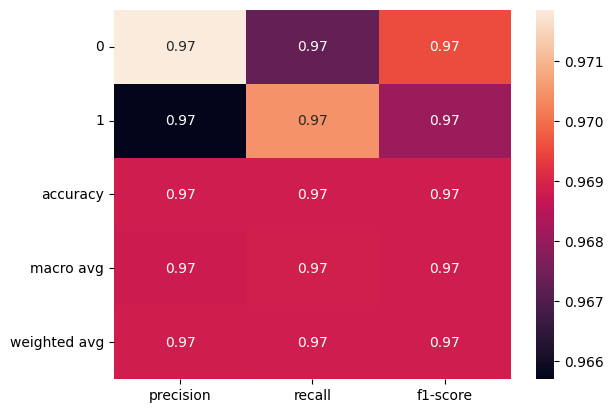

In [60]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)
dt.fit(X_train, class3_target)
classificationdt = eval_metrics(dt, X_test , class3_test)

In [61]:
classificationdt

{'0': {'precision': 0.9718630997146916,
  'recall': 0.9672904413948791,
  'f1-score': 0.9695713792323176,
  'support': 84165.0},
 '1': {'precision': 0.965690001121649,
  'recall': 0.9704795661485666,
  'f1-score': 0.9680788595844628,
  'support': 79843.0},
 'accuracy': 0.9688429832691088,
 'macro avg': {'precision': 0.9687765504181703,
  'recall': 0.9688850037717228,
  'f1-score': 0.9688251194083902,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9688578883166847,
  'recall': 0.9688429832691088,
  'f1-score': 0.9688447851256662,
  'support': 164008.0}}

In [90]:
dt=DecisionTreeClassifier()

parameter_grid = {'max_depth': [15,20,30,40,50],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(dt, param_grid = parameter_grid, 
                          cv =7, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))



Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV 1/7] END ......criterion=gini, max_depth=15;, score=0.975 total time= 1.7min
[CV 2/7] END ......criterion=gini, max_depth=15;, score=0.975 total time= 2.2min
[CV 3/7] END ......criterion=gini, max_depth=15;, score=0.975 total time= 2.3min
[CV 4/7] END ......criterion=gini, max_depth=15;, score=0.976 total time= 2.4min
[CV 5/7] END ......criterion=gini, max_depth=15;, score=0.976 total time= 2.2min
[CV 6/7] END ......criterion=gini, max_depth=15;, score=0.977 total time= 2.1min
[CV 7/7] END ......criterion=gini, max_depth=15;, score=0.975 total time= 2.1min
[CV 1/7] END ......criterion=gini, max_depth=20;, score=0.979 total time= 2.8min
[CV 2/7] END ......criterion=gini, max_depth=20;, score=0.978 total time= 3.1min
[CV 3/7] END ......criterion=gini, max_depth=20;, score=0.979 total time= 2.8min
[CV 4/7] END ......criterion=gini, max_depth=20;, score=0.980 total time= 2.8min
[CV 5/7] END ......criterion=gini, max_depth=20;

### Naive Bayes

In [50]:
gnb_clf = GaussianNB()

parameter_grid = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
                 }

grid_search = GridSearchCV(gnb_clf, param_grid = parameter_grid, 
                          cv =5, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ................var_smoothing=0.01;, score=0.832 total time=   1.7s
[CV 2/5] END ................var_smoothing=0.01;, score=0.856 total time=   1.5s
[CV 3/5] END ................var_smoothing=0.01;, score=0.805 total time=   1.4s
[CV 4/5] END ................var_smoothing=0.01;, score=0.846 total time=   1.3s
[CV 5/5] END ................var_smoothing=0.01;, score=0.853 total time=   1.4s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.886 total time=   1.3s
[CV 2/5] END ...............var_smoothing=0.001;, score=0.898 total time=   1.3s
[CV 3/5] END ...............var_smoothing=0.001;, score=0.877 total time=   1.2s
[CV 4/5] END ...............var_smoothing=0.001;, score=0.895 total time=   1.2s
[CV 5/5] END ...............var_smoothing=0.001;, score=0.895 total time=   1.3s
[CV 1/5] END ..............var_smoothing=0.0001;, score=0.883 total time=   1.2s
[CV 2/5] END ..............var_smoothing=0.0001;

In [52]:
gnb = GaussianNB(var_smoothing= 1e-7)
gnb.fit(X_train, class3_target)
eval_metrics(gnb, X_train , class3_target)
eval_metrics(gnb, X_test , class3_test)


Model Accuracy:
 0.8043049794902984

Confusion matrix:
 [[254387  82273]
 [ 46109 273262]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80    336660
           1       0.77      0.86      0.81    319371

    accuracy                           0.80    656031
   macro avg       0.81      0.81      0.80    656031
weighted avg       0.81      0.80      0.80    656031


MCC: 0.6131950596403083


Model Accuracy:
 0.8039120042924736

Confusion matrix:
 [[63518 20647]
 [11513 68330]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80     84165
           1       0.77      0.86      0.81     79843

    accuracy                           0.80    164008
   macro avg       0.81      0.81      0.80    164008
weighted avg       0.81      0.80      0.80    164008


MCC: 0.6124950993514726




Model Accuracy:
 0.8039120042924736

Confusion matrix:
 [[63518 20647]
 [11513 68330]]

Classification report:
 {'0': {'precision': 0.8465567565406299, 'recall': 0.7546842511732905, 'f1-score': 0.7979848739918087, 'support': 84165.0}, '1': {'precision': 0.7679512683052924, 'recall': 0.8558045163633631, 'f1-score': 0.8095012439284445, 'support': 79843.0}, 'accuracy': 0.8039120042924736, 'macro avg': {'precision': 0.8072540124229611, 'recall': 0.8052443837683267, 'f1-score': 0.8037430589601267, 'support': 164008.0}, 'weighted avg': {'precision': 0.8082897329980341, 'recall': 0.8039120042924736, 'f1-score': 0.8035913171217219, 'support': 164008.0}}

MCC: 0.6124950993514726



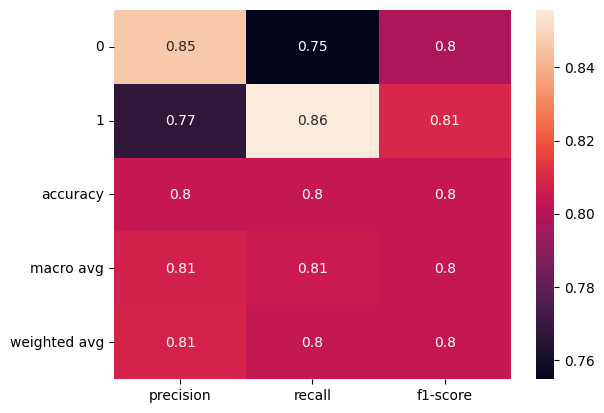

In [59]:
gnb = GaussianNB(var_smoothing= 1e-7)
gnb.fit(X_train, class3_target)
classificationgnb = eval_metrics(gnb, X_test , class3_test)

In [58]:
classification

{'0': {'precision': 0.8465567565406299,
  'recall': 0.7546842511732905,
  'f1-score': 0.7979848739918087,
  'support': 84165.0},
 '1': {'precision': 0.7679512683052924,
  'recall': 0.8558045163633631,
  'f1-score': 0.8095012439284445,
  'support': 79843.0},
 'accuracy': 0.8039120042924736,
 'macro avg': {'precision': 0.8072540124229611,
  'recall': 0.8052443837683267,
  'f1-score': 0.8037430589601267,
  'support': 164008.0},
 'weighted avg': {'precision': 0.8082897329980341,
  'recall': 0.8039120042924736,
  'f1-score': 0.8035913171217219,
  'support': 164008.0}}

### K-nearest neighbor

In [51]:
knn = KNeighborsClassifier()

k_range = [5,6,7]
weight_options = ['uniform', 'distance']
parameter_grid = dict(n_neighbors=k_range, weights=weight_options)


grid_search = GridSearchCV(knn, param_grid = parameter_grid,
                          cv =5, verbose = 2)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .....................n_neighbors=5, weights=uniform; total time= 3.9min
[CV] END .....................n_neighbors=5, weights=uniform; total time= 3.9min
[CV] END .....................n_neighbors=5, weights=uniform; total time= 3.9min
[CV] END .....................n_neighbors=5, weights=uniform; total time= 3.9min
[CV] END .....................n_neighbors=5, weights=uniform; total time= 3.9min
[CV] END ....................n_neighbors=5, weights=distance; total time= 3.7min
[CV] END ....................n_neighbors=5, weights=distance; total time= 3.8min
[CV] END ....................n_neighbors=5, weights=distance; total time= 3.8min
[CV] END ....................n_neighbors=5, weights=distance; total time= 3.7min
[CV] END ....................n_neighbors=5, weights=distance; total time= 3.7min
[CV] END .....................n_neighbors=6, weights=uniform; total time= 3.8min
[CV] END .....................n_neighbors=6, weig

In [41]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, class3_target)
eval_metrics(knn, X_test , class3_test)


Model Accuracy:
 0.9664772450124384

Confusion matrix:
 [[81723  2442]
 [ 3056 76787]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     84165
           1       0.97      0.96      0.97     79843

    accuracy                           0.97    164008
   macro avg       0.97      0.97      0.97    164008
weighted avg       0.97      0.97      0.97    164008


MCC: 0.9329208458578099



In [51]:
eval_metrics(knn, X_train , class3_target)


Model Accuracy:
 0.9999878169549697

Confusion matrix:
 [[294978      2]
 [     5 279584]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    294980
           1       1.00      1.00      1.00    279589

    accuracy                           1.00    574569
   macro avg       1.00      1.00      1.00    574569
weighted avg       1.00      1.00      1.00    574569


MCC: 0.9999756164613883




Model Accuracy:
 0.9660199502463295

Confusion matrix:
 [[81618  2547]
 [ 3026 76817]]

Classification report:
 {'0': {'precision': 0.964250271726289, 'recall': 0.9697380146141508, 'f1-score': 0.966986357362463, 'support': 84165.0}, '1': {'precision': 0.9679073635401442, 'recall': 0.9621006224716006, 'f1-score': 0.9649952577462048, 'support': 79843.0}, 'accuracy': 0.9660199502463295, 'macro avg': {'precision': 0.9660788176332166, 'recall': 0.9659193185428756, 'f1-score': 0.9659908075543339, 'support': 164008.0}, 'weighted avg': {'precision': 0.9660306311093291, 'recall': 0.9660199502463295, 'f1-score': 0.9660170426542724, 'support': 164008.0}}

MCC: 0.9319981225280177



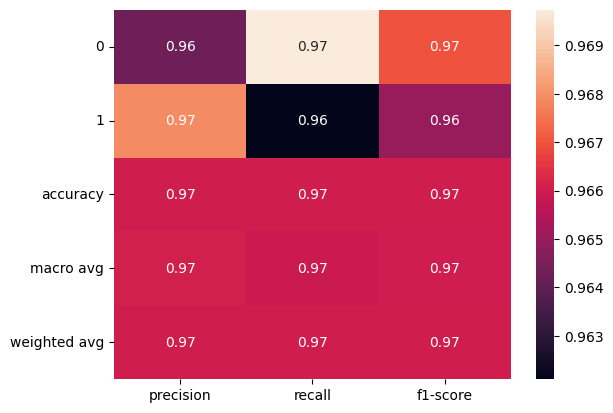

In [62]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, class3_target)
classificationknn = eval_metrics(knn, X_test , class3_test)

In [63]:
classificationknn

{'0': {'precision': 0.964250271726289,
  'recall': 0.9697380146141508,
  'f1-score': 0.966986357362463,
  'support': 84165.0},
 '1': {'precision': 0.9679073635401442,
  'recall': 0.9621006224716006,
  'f1-score': 0.9649952577462048,
  'support': 79843.0},
 'accuracy': 0.9660199502463295,
 'macro avg': {'precision': 0.9660788176332166,
  'recall': 0.9659193185428756,
  'f1-score': 0.9659908075543339,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9660306311093291,
  'recall': 0.9660199502463295,
  'f1-score': 0.9660170426542724,
  'support': 164008.0}}

### Suport Vector Machine

In [52]:
svc=svm.LinearSVC()

parameter_grid = {'C': [0.1, 1, 10, 100],
              'loss': ['hinge','squared_hinge']}

grid_search = GridSearchCV(svc, param_grid = parameter_grid,
                          cv =5, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.978 total time= 3.9min
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.978 total time= 3.9min
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.979 total time= 4.1min
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.978 total time= 3.8min
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.979 total time= 3.9min
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.977 total time= 7.2min
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.978 total time= 6.8min
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.978 total time= 7.1min
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.977 total time= 7.1min
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.978 total time= 7.2min
[CV 1/5] END ...................C=1, loss=hinge;, score=0.978 total time= 6.6min
[CV 2/5] END ...................C=1, loss=hinge;,

In [42]:
svc=svm.LinearSVC(C = 1, loss = 'hinge', penalty ='l2')
svc.fit(X_train, class3_target)
eval_metrics(svc, X_test, class3_test)



Model Accuracy:
 0.9156992341836984

Confusion matrix:
 [[77939  6226]
 [ 7600 72243]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     84165
           1       0.92      0.90      0.91     79843

    accuracy                           0.92    164008
   macro avg       0.92      0.92      0.92    164008
weighted avg       0.92      0.92      0.92    164008


MCC: 0.831323687533099



In [55]:
eval_metrics(svc, X_train , class3_target)


Model Accuracy:
 0.928734407877905

Confusion matrix:
 [[280036  14944]
 [ 26003 253586]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93    294980
           1       0.94      0.91      0.93    279589

    accuracy                           0.93    574569
   macro avg       0.93      0.93      0.93    574569
weighted avg       0.93      0.93      0.93    574569


MCC: 0.8578572118575332




Model Accuracy:
 0.9149980488756646

Confusion matrix:
 [[78032  6133]
 [ 7808 72035]]

Classification report:
 {'0': {'precision': 0.909040074557316, 'recall': 0.9271312303213926, 'f1-score': 0.9179965295138379, 'support': 84165.0}, '1': {'precision': 0.9215407839525125, 'recall': 0.902208083363601, 'f1-score': 0.9117719652429261, 'support': 79843.0}, 'accuracy': 0.9149980488756646, 'macro avg': {'precision': 0.9152904292549142, 'recall': 0.9146696568424968, 'f1-score': 0.914884247378382, 'support': 164008.0}, 'weighted avg': {'precision': 0.9151257175761971, 'recall': 0.9149980488756646, 'f1-score': 0.914966263398268, 'support': 164008.0}}

MCC: 0.8299598539426072



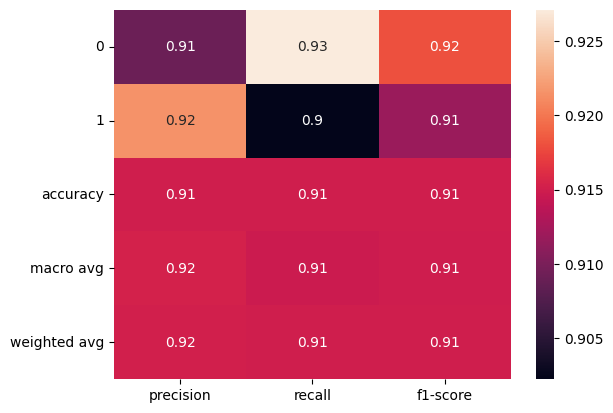

In [64]:
svc=svm.LinearSVC(C = 1, loss = 'hinge', penalty ='l2')
svc.fit(X_train, class3_target)
classificationsvm = eval_metrics(svc, X_test , class3_test)

In [65]:
classificationsvm

{'0': {'precision': 0.909040074557316,
  'recall': 0.9271312303213926,
  'f1-score': 0.9179965295138379,
  'support': 84165.0},
 '1': {'precision': 0.9215407839525125,
  'recall': 0.902208083363601,
  'f1-score': 0.9117719652429261,
  'support': 79843.0},
 'accuracy': 0.9149980488756646,
 'macro avg': {'precision': 0.9152904292549142,
  'recall': 0.9146696568424968,
  'f1-score': 0.914884247378382,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9151257175761971,
  'recall': 0.9149980488756646,
  'f1-score': 0.914966263398268,
  'support': 164008.0}}

### Logistic Regression

In [53]:
clf = LogisticRegression()

parameter_grid = {'C':[1, 10, 100, 1000]}

grid_search = GridSearchCV(clf, param_grid = parameter_grid,
                          cv =5, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............................C=1;, score=0.978 total time=  13.6s
[CV 2/5] END ...............................C=1;, score=0.978 total time=  14.0s
[CV 3/5] END ...............................C=1;, score=0.978 total time=  14.4s
[CV 4/5] END ...............................C=1;, score=0.977 total time=  15.1s
[CV 5/5] END ...............................C=1;, score=0.978 total time=  16.0s
[CV 1/5] END ..............................C=10;, score=0.978 total time=  14.4s
[CV 2/5] END ..............................C=10;, score=0.978 total time=  13.5s
[CV 3/5] END ..............................C=10;, score=0.978 total time=  13.8s
[CV 4/5] END ..............................C=10;, score=0.977 total time=  14.6s
[CV 5/5] END ..............................C=10;, score=0.978 total time=  13.4s
[CV 1/5] END .............................C=100;, score=0.977 total time=  14.2s
[CV 2/5] END .............................C=100;,

In [43]:
clf = LogisticRegression( C = 1000, penalty = 'l2')
clf.fit(X_train, class3_target)
eval_metrics(clf, X_test , class3_test)


Model Accuracy:
 0.9172052582800839

Confusion matrix:
 [[78864  5301]
 [ 8278 71565]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     84165
           1       0.93      0.90      0.91     79843

    accuracy                           0.92    164008
   macro avg       0.92      0.92      0.92    164008
weighted avg       0.92      0.92      0.92    164008


MCC: 0.8346886841593696



In [57]:
eval_metrics(clf, X_train , class3_target)


Model Accuracy:
 0.9227943032081438

Confusion matrix:
 [[278276  16704]
 [ 27656 251933]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93    294980
           1       0.94      0.90      0.92    279589

    accuracy                           0.92    574569
   macro avg       0.92      0.92      0.92    574569
weighted avg       0.92      0.92      0.92    574569


MCC: 0.8459367369163572




Model Accuracy:
 0.9167784498317155

Confusion matrix:
 [[78810  5355]
 [ 8294 71549]]

Classification report:
 {'0': {'precision': 0.9047804922850845, 'recall': 0.9363749777223311, 'f1-score': 0.9203066521086711, 'support': 84165.0}, '1': {'precision': 0.930367731197337, 'recall': 0.8961211377328007, 'f1-score': 0.912923373334099, 'support': 79843.0}, 'accuracy': 0.9167784498317155, 'macro avg': {'precision': 0.9175741117412107, 'recall': 0.9162480577275659, 'f1-score': 0.916615012721385, 'support': 164008.0}, 'weighted avg': {'precision': 0.9172369695085796, 'recall': 0.9167784498317155, 'f1-score': 0.9167122961797033, 'support': 164008.0}}

MCC: 0.8338211150350956



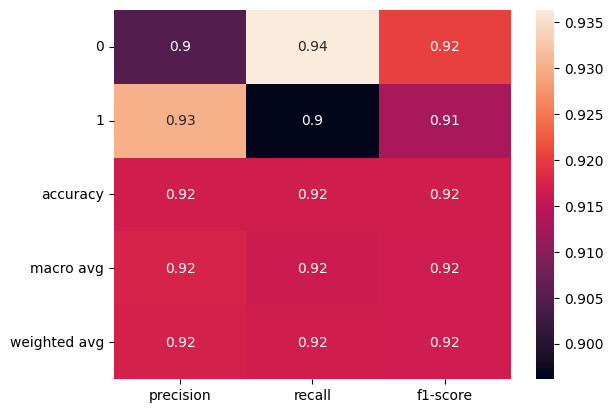

In [66]:
clf = LogisticRegression( C = 1000, penalty = 'l2')
clf.fit(X_train, class3_target)
classificationclf = eval_metrics(clf, X_test , class3_test)

In [67]:
classificationclf

{'0': {'precision': 0.9047804922850845,
  'recall': 0.9363749777223311,
  'f1-score': 0.9203066521086711,
  'support': 84165.0},
 '1': {'precision': 0.930367731197337,
  'recall': 0.8961211377328007,
  'f1-score': 0.912923373334099,
  'support': 79843.0},
 'accuracy': 0.9167784498317155,
 'macro avg': {'precision': 0.9175741117412107,
  'recall': 0.9162480577275659,
  'f1-score': 0.916615012721385,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9172369695085796,
  'recall': 0.9167784498317155,
  'f1-score': 0.9167122961797033,
  'support': 164008.0}}

In [89]:
clf = LogisticRegression()

parameter_grid = {'C':[1, 10, 100, 1000]}

grid_search = GridSearchCV(clf, param_grid = parameter_grid,
                          cv =7, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 4 candidates, totalling 28 fits
[CV 1/7] END ...............................C=1;, score=0.934 total time=   3.3s
[CV 2/7] END ...............................C=1;, score=0.933 total time=   3.3s
[CV 3/7] END ...............................C=1;, score=0.935 total time=   3.2s
[CV 4/7] END ...............................C=1;, score=0.935 total time=   3.3s
[CV 5/7] END ...............................C=1;, score=0.934 total time=   3.2s
[CV 6/7] END ...............................C=1;, score=0.936 total time=   3.3s
[CV 7/7] END ...............................C=1;, score=0.934 total time=   3.5s
[CV 1/7] END ..............................C=10;, score=0.934 total time=   3.4s
[CV 2/7] END ..............................C=10;, score=0.933 total time=   3.5s
[CV 3/7] END ..............................C=10;, score=0.935 total time=   3.5s
[CV 4/7] END ..............................C=10;, score=0.933 total time=   3.6s
[CV 5/7] END ..............................C=10;,

### XGB

In [54]:
xgb_model = xgb.XGBClassifier()

params = { 
    'model__max_depth': [3,4],
    'model__learning_rate': [ 0.01, 0.1, 1 ],
    "model__gamma":[0, 0.25, 0.5, 0.75, 1],
    'model__n_estimators': [50 ,100, 300, 500],
    #"model__subsample":[0.9],
    #"model__colsample_bytree":[0.5],
    #"model__early_stopping_rounds": [10], 
}


grid_search = GridSearchCV(xgb_model, param_grid = params, cv =StratifiedKFold(5), verbose = 3)
model = grid_search.fit(X_train, class3_target)
print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.992 total time=  10.1s
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.992 total time=   9.5s
[CV 3/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.993 total time=  25.3s
[CV 4/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.992 total time= 1.4min
[CV 5/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.993 total time= 1.4min
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.992 total time= 1.4min
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.992 total time=  53.2s
[CV 3/5] EN

### RF

In [ ]:
rfc=RandomForestClassifier()

parameter_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth' : [20, 30, 40],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.988 total time=28.9min
[CV 2/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.988 total time=29.3min
[CV 3/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.989 total time=30.6min
[CV 4/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.987 total time=30.9min
[CV 5/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.988 total time=30.7min
[CV 1/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.988 total time=61.4min
[CV 2/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.988 total time=61.4min
[CV 3/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.989 total time=61.5min
[CV 4/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.988 total time=61.7min
[CV 5/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.98

### Graph Results F1-Score

In [75]:
r = [0,1]

l = []

for index in r:
    l1 = list()
    l1.append(str(index))
    l1.append(classificationdt[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationknn[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationsvm[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationclf[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationgnb[str(index)]['f1-score'])
    print(l1)
    l.append(l1)
print(l)



['0', 0.9695713792323176]
['0', 0.9695713792323176, 0.966986357362463]
['0', 0.9695713792323176, 0.966986357362463, 0.9179965295138379]
['0', 0.9695713792323176, 0.966986357362463, 0.9179965295138379, 0.9203066521086711]
['0', 0.9695713792323176, 0.966986357362463, 0.9179965295138379, 0.9203066521086711, 0.7979848739918087]
['1', 0.9680788595844628]
['1', 0.9680788595844628, 0.9649952577462048]
['1', 0.9680788595844628, 0.9649952577462048, 0.9117719652429261]
['1', 0.9680788595844628, 0.9649952577462048, 0.9117719652429261, 0.912923373334099]
['1', 0.9680788595844628, 0.9649952577462048, 0.9117719652429261, 0.912923373334099, 0.8095012439284445]
[['0', 0.9695713792323176, 0.966986357362463, 0.9179965295138379, 0.9203066521086711, 0.7979848739918087], ['1', 0.9680788595844628, 0.9649952577462048, 0.9117719652429261, 0.912923373334099, 0.8095012439284445]]


In [77]:
df = pd.DataFrame(l)
df.rename(columns = {0: "class", 1: "DT", 2: "KNN", 3: "SVM",4: "LR", 5: "NB"}, inplace = True)

df

,class,DT,KNN,SVM,LR,NB
0,0,0.969571,0.966986,0.917997,0.920307,0.797985
1,1,0.968079,0.964995,0.911772,0.912923,0.809501


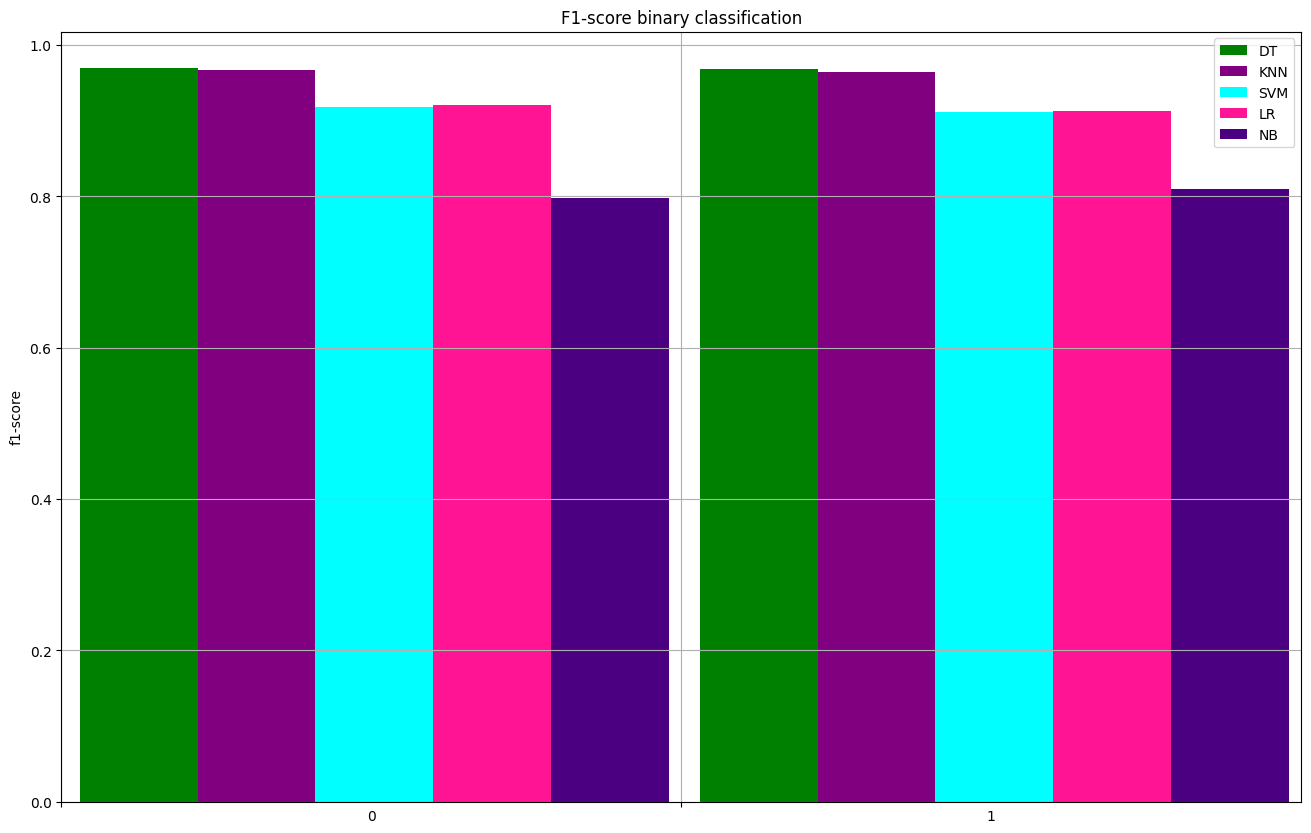

In [86]:
import matplotlib.ticker as ticker

pos = list(range(len(df)))
num_col = len(df.columns) - 1
width = 0.95 / num_col

fig, ax = plt.subplots(figsize=(16,10))

bar_colors = ['green', 'purple', 'cyan', 'deeppink', 'indigo']
bar_labels = df.columns[1:]

for i, (colname, color, lbl) in enumerate(zip(df.columns[1:], bar_colors, bar_labels)):
    delta_p = 0.125 + width*i
    plt.bar([p + delta_p for p in pos],
            df[colname], width, color=color, label=lbl)
ax.set_ylabel('f1-score')
ax.set_title('F1-score binary classification')
ax.set_xticks(pos)

def update_ticks(x, pos):
    return df['class'][pos]

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(ticker.FuncFormatter(update_ticks))
ax.xaxis.set_minor_locator(ticker.FixedLocator([p+0.5 for p in pos]))
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
plt.xlim(min(pos), max(pos)+1)
plt.legend()
plt.grid()
plt.show()

## Multiclass 9

In [45]:
attacks_9 = attacks_9 = ["Normal", "Reconnaissance" , "Weaponization", "Exploitation", "Lateral Movement", "Comand and Control" , "Exfiltration", 
               "Tampering", "Crypto-ransomware", "RDOS"]

In [46]:
class2_train = y_train.copy(deep=True)
class2_train = y_train.replace({1:9 , 2:1 , 3:1, 4:2, 5:4, 6:1, 7:6, 8:2, 9:4, 10:7, 11:5, 12:2, 13:4, 14:1, 15:3, 16:8})
class2_train.value_counts()

class1
0    336660
9    113009
1    102072
2     53805
4     25276
6     17707
7      4075
5      2247
3       813
8       367
Name: count, dtype: int64

In [47]:
class2_test = y_test.copy(deep=True)
class2_test = y_test.replace({1:9 , 2:1 , 3:1, 4:2, 5:4, 6:1, 7:6, 8:2, 9:4, 10:7, 11:5, 12:2, 13:4, 14:1, 15:3, 16:8})
class2_test.value_counts()

class1
0    84165
9    28252
1    25518
2    13451
4     6320
6     4427
7     1019
5      562
3      203
8       91
Name: count, dtype: int64

### DT


Model Accuracy:
 0.999871957270312

Confusion matrix:
 [[336641     15      0      0      4      0      0      0      0      0]
 [    15 102057      0      0      0      0      0      0      0      0]
 [     0      0  53805      0      0      0      0      0      0      0]
 [     0      0      0    813      0      0      0      0      0      0]
 [    48      0      0      0  25228      0      0      0      0      0]
 [     1      1      0      0      0   2245      0      0      0      0]
 [     0      0      0      0      0      0  17707      0      0      0]
 [     0      0      0      0      0      0      0   4075      0      0]
 [     0      0      0      0      0      0      0      0    367      0]
 [     0      0      0      0      0      0      0      0      0 113009]]

Classification report:
 {'0': {'precision': 0.9998099226325715, 'recall': 0.999943563238876, 'f1-score': 0.9998767384702204, 'support': 336660.0}, '1': {'precision': 0.999843249439127, 'recall': 0.999853044909475

{'0': {'precision': 0.9998099226325715,
  'recall': 0.999943563238876,
  'f1-score': 0.9998767384702204,
  'support': 336660.0},
 '1': {'precision': 0.999843249439127,
  'recall': 0.9998530449094757,
  'f1-score': 0.9998481471503099,
  'support': 102072.0},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 53805.0},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 813.0},
 '4': {'precision': 0.9998414711477489,
  'recall': 0.9981009653426175,
  'f1-score': 0.9989704601251287,
  'support': 25276.0},
 '5': {'precision': 1.0,
  'recall': 0.9991099243435692,
  'f1-score': 0.9995547640249333,
  'support': 2247.0},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17707.0},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4075.0},
 '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 367.0},
 '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 113009.0},
 'accuracy': 0.999871957270312,
 'ma

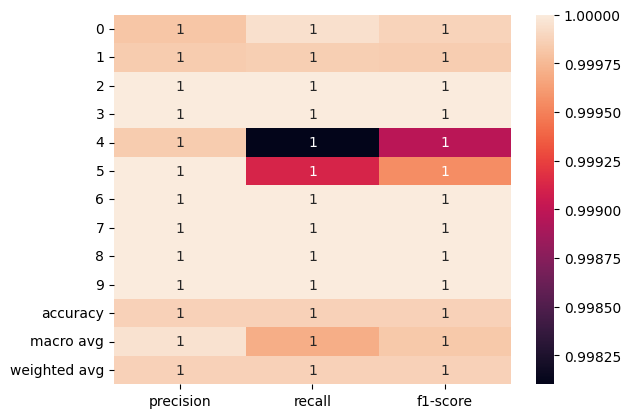

In [46]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 30)
dt.fit(X_train, class2_train)

eval_metrics(dt, X_train , class2_train)


Model Accuracy:
 0.9890798009853178

Confusion matrix:
 [[83281   633    12    13    89   101    23     5     2     6]
 [  527 24970     5     0    10     1     4     0     0     1]
 [    5     1 13437     0     0     0     8     0     0     0]
 [    6     9     0   186     2     0     0     0     0     0]
 [  104    10     2     5  6178     1     0    20     0     0]
 [  113     6     0     0     1   442     0     0     0     0]
 [    5     6     7     0     0     0  4409     0     0     0]
 [    6     0     0     0    34     0     0   979     0     0]
 [    3     0     0     0     1     0     0     0    87     0]
 [    2     2     0     0     0     0     0     0     0 28248]]

Classification report:
 {'0': {'precision': 0.990827107028982, 'recall': 0.9894968217192419, 'f1-score': 0.9901615175636231, 'support': 84165.0}, '1': {'precision': 0.9739829153177049, 'recall': 0.978524962771377, 'f1-score': 0.9762486560453524, 'support': 25518.0}, '2': {'precision': 0.9980687811037658, 'reca

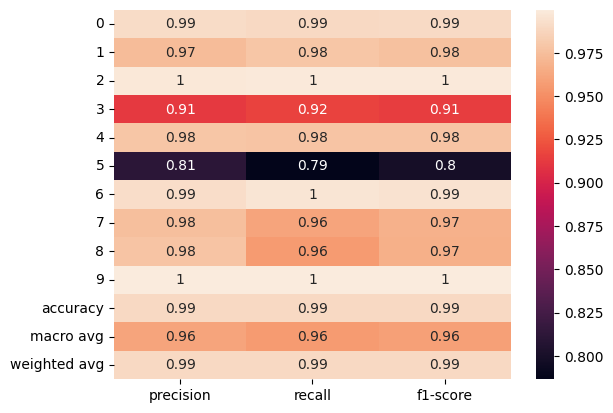

In [47]:
results_9_dt = eval_metrics(dt, X_test , class2_test)

### KNN


Model Accuracy:
 0.9999939027271577

Confusion matrix:
 [[336659      1      0      0      0      0      0      0      0      0]
 [     2 102070      0      0      0      0      0      0      0      0]
 [     0      0  53805      0      0      0      0      0      0      0]
 [     0      0      0    813      0      0      0      0      0      0]
 [     0      0      0      0  25276      0      0      0      0      0]
 [     1      0      0      0      0   2246      0      0      0      0]
 [     0      0      0      0      0      0  17707      0      0      0]
 [     0      0      0      0      0      0      0   4075      0      0]
 [     0      0      0      0      0      0      0      0    367      0]
 [     0      0      0      0      0      0      0      0      0 113009]]

Classification report:
 {'0': {'precision': 0.9999910889853919, 'recall': 0.9999970296441514, 'f1-score': 0.9999940593059489, 'support': 336660.0}, '1': {'precision': 0.9999902028979828, 'recall': 0.999980405987

{'0': {'precision': 0.9999910889853919,
  'recall': 0.9999970296441514,
  'f1-score': 0.9999940593059489,
  'support': 336660.0},
 '1': {'precision': 0.9999902028979828,
  'recall': 0.9999804059879301,
  'f1-score': 0.9999853044189613,
  'support': 102072.0},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 53805.0},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 813.0},
 '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25276.0},
 '5': {'precision': 1.0,
  'recall': 0.9995549621717846,
  'f1-score': 0.9997774315602047,
  'support': 2247.0},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17707.0},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4075.0},
 '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 367.0},
 '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 113009.0},
 'accuracy': 0.9999939027271577,
 'macro avg': {'precision': 0.9999981291883374,
  'r

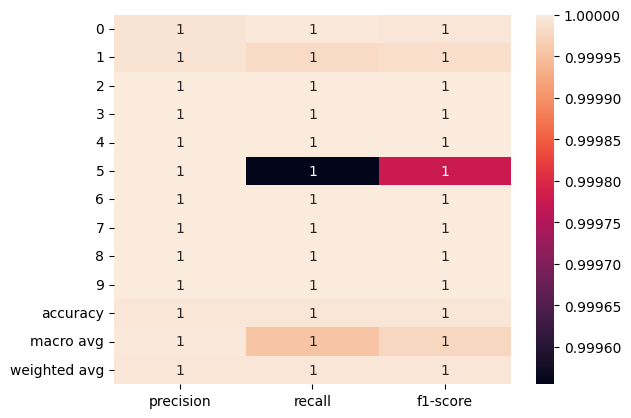

In [48]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, class2_train)
eval_metrics(knn, X_train , class2_train)


Model Accuracy:
 0.9811472611092141

Confusion matrix:
 [[82517   689   442     0    99    68   295    10     1    44]
 [  514 24997     0     0     5     2     0     0     0     0]
 [   31     1 13414     0     0     0     5     0     0     0]
 [   46    27     0   119    11     0     0     0     0     0]
 [  372    11     3     1  5907     2     0    24     0     0]
 [  137     1     0     0     0   424     0     0     0     0]
 [   40     1     8     0     0     0  4378     0     0     0]
 [  167     0     0     0    30     0     0   822     0     0]
 [    4     0     1     0     0     0     0     0    86     0]
 [    0     0     0     0     0     0     0     0     0 28252]]

Classification report:
 {'0': {'precision': 0.9843608340888486, 'recall': 0.9804194142458267, 'f1-score': 0.982386170852357, 'support': 84165.0}, '1': {'precision': 0.9716251409025537, 'recall': 0.9795830394231523, 'f1-score': 0.9755878622304616, 'support': 25518.0}, '2': {'precision': 0.9672627631958466, 'rec

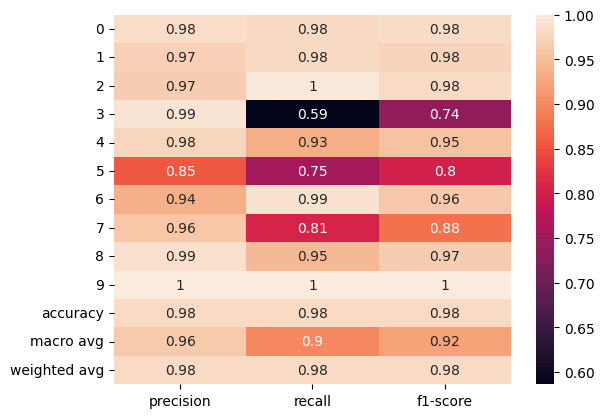

In [49]:
results_9_knn = eval_metrics(knn, X_test , class2_test)

### LR


Model Accuracy:
 0.9787510041446212

Confusion matrix:
 [[335005    597    111     14    365    328      5     83     27    125]
 [  9127  92011    795      0    120     11      0      0      0      8]
 [    11     19  53675      0      5      0     94      0      1      0]
 [     8    126      1    627     51      0      0      0      0      0]
 [   597    184      0      6  24396      0      1     89      3      0]
 [   532      0      0      0      0   1715      0      0      0      0]
 [    13      3    220      0      4      0  17467      0      0      0]
 [    56      0      0      0     87      0      0   3932      0      0]
 [    26      0      0      0      0      0      0      0    341      0]
 [    87      0      0      0      0      0      0      0      0 112922]]

Classification report:
 {'0': {'precision': 0.9697303900284256, 'recall': 0.9950840610705163, 'f1-score': 0.9822436455648696, 'support': 336660.0}, '1': {'precision': 0.9900043038519475, 'recall': 0.901432322282

{'0': {'precision': 0.9697303900284256,
  'recall': 0.9950840610705163,
  'f1-score': 0.9822436455648696,
  'support': 336660.0},
 '1': {'precision': 0.9900043038519475,
  'recall': 0.9014323222823105,
  'f1-score': 0.9436444936721843,
  'support': 102072.0},
 '2': {'precision': 0.9794350571147038,
  'recall': 0.9975838676702908,
  'f1-score': 0.988426160376403,
  'support': 53805.0},
 '3': {'precision': 0.9690880989180835,
  'recall': 0.7712177121771218,
  'f1-score': 0.8589041095890411,
  'support': 813.0},
 '4': {'precision': 0.9747482819242449,
  'recall': 0.9651843646146542,
  'f1-score': 0.9699427480916031,
  'support': 25276.0},
 '5': {'precision': 0.8349561830574489,
  'recall': 0.7632398753894081,
  'f1-score': 0.7974889560567311,
  'support': 2247.0},
 '6': {'precision': 0.9943075083964251,
  'recall': 0.9864460382899418,
  'f1-score': 0.9903611725350117,
  'support': 17707.0},
 '7': {'precision': 0.9580896686159844,
  'recall': 0.9649079754601227,
  'f1-score': 0.96148673431

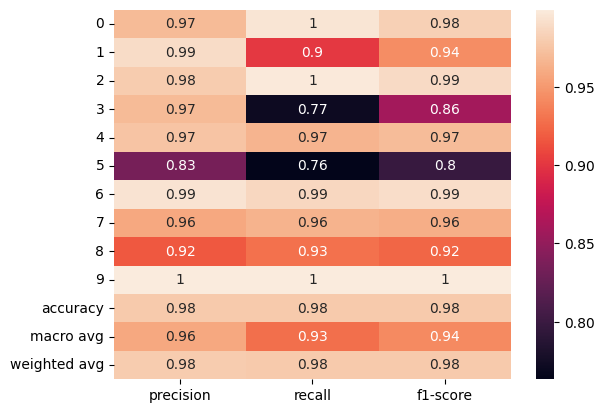

In [50]:
clf = LogisticRegression( C = 100, penalty = 'l2')
clf.fit(X_train, class2_train)
eval_metrics(clf, X_train , class2_train)


Model Accuracy:
 0.9783547144041754

Confusion matrix:
 [[83687   170    33     5   112    87     6    18     9    38]
 [ 2307 23013   168     0    25     2     0     0     0     3]
 [    5     8 13418     0     0     0    19     0     1     0]
 [    3    36     0   144    20     0     0     0     0     0]
 [  146    42     0     2  6103     2     0    25     0     0]
 [  132     0     0     0     0   430     0     0     0     0]
 [    0     0    58     0     1     0  4368     0     0     0]
 [   13     0     0     0    29     0     0   977     0     0]
 [    6     0     0     0     0     1     0     0    84     0]
 [   18     0     0     0     0     0     0     0     0 28234]]

Classification report:
 {'0': {'precision': 0.9695309151152148, 'recall': 0.9943206796174182, 'f1-score': 0.9817693363522249, 'support': 84165.0}, '1': {'precision': 0.9889982379990545, 'recall': 0.9018339995297437, 'f1-score': 0.9434070551581364, 'support': 25518.0}, '2': {'precision': 0.9810630986327411, 're

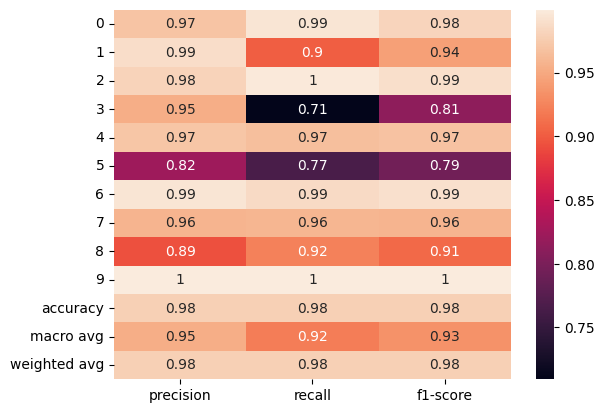

In [51]:
results_9_lr = eval_metrics(clf, X_test , class2_test)

### SVM

In [62]:
svc=svm.LinearSVC()

parameter_grid = {'C': [10, 100],
              'loss': ['hinge','squared_hinge']}

grid_search = GridSearchCV(svc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..................C=10, loss=hinge;, score=0.979 total time=16.3min
[CV 2/5] END ..................C=10, loss=hinge;, score=0.979 total time=16.6min
[CV 3/5] END ..................C=10, loss=hinge;, score=0.978 total time=17.2min
[CV 4/5] END ..................C=10, loss=hinge;, score=0.979 total time=17.0min
[CV 5/5] END ..................C=10, loss=hinge;, score=0.979 total time=17.2min
[CV 1/5] END ..........C=10, loss=squared_hinge;, score=0.978 total time=19.6min
[CV 2/5] END ..........C=10, loss=squared_hinge;, score=0.978 total time=19.8min
[CV 3/5] END ..........C=10, loss=squared_hinge;, score=0.978 total time=20.6min
[CV 4/5] END ..........C=10, loss=squared_hinge;, score=0.978 total time=20.4min
[CV 5/5] END ..........C=10, loss=squared_hinge;, score=0.979 total time=20.2min
[CV 1/5] END .................C=100, loss=hinge;, score=0.975 total time=22.8min
[CV 2/5] END .................C=100, loss=hinge;,


Model Accuracy:
 0.9776001438956391

Confusion matrix:
 [[334509    902     34     23    426    612     50     31      7     66]
 [  9280  92191    432      9    102     54      2      0      1      1]
 [    14    169  53164      0    322      0    136      0      0      0]
 [    10    119      0    683      1      0      0      0      0      0]
 [   691    200      0    119  24153      0     16     95      2      0]
 [   301      4      0      0      0   1919      0      0      0     23]
 [    24      3    136      0      1      0  17543      0      0      0]
 [   107      1      0     12     42      0      0   3910      1      2]
 [    23      0      0      1      0      0      0      0    343      0]
 [    75     13      0      0      0      0      0      0      0 112921]]

Classification report:
 {'0': {'precision': 0.9694957598381608, 'recall': 0.9936107645695954, 'f1-score': 0.9814051465906991, 'support': 336660.0}, '1': {'precision': 0.98492553577915, 'recall': 0.90319578336860

{'0': {'precision': 0.9694957598381608,
  'recall': 0.9936107645695954,
  'f1-score': 0.9814051465906991,
  'support': 336660.0},
 '1': {'precision': 0.98492553577915,
  'recall': 0.9031957833686025,
  'f1-score': 0.9422917710068788,
  'support': 102072.0},
 '2': {'precision': 0.988803332961351,
  'recall': 0.9880866090512034,
  'f1-score': 0.9884448410817042,
  'support': 53805.0},
 '3': {'precision': 0.8063754427390791,
  'recall': 0.8400984009840098,
  'f1-score': 0.8228915662650601,
  'support': 813.0},
 '4': {'precision': 0.9643071026470236,
  'recall': 0.9555705016616554,
  'f1-score': 0.9599189237525585,
  'support': 25276.0},
 '5': {'precision': 0.7423597678916828,
  'recall': 0.8540275923453493,
  'f1-score': 0.7942880794701986,
  'support': 2247.0},
 '6': {'precision': 0.9885050994534288,
  'recall': 0.9907381261647936,
  'f1-score': 0.989620353133638,
  'support': 17707.0},
 '7': {'precision': 0.9687809712586719,
  'recall': 0.9595092024539877,
  'f1-score': 0.96412279620268

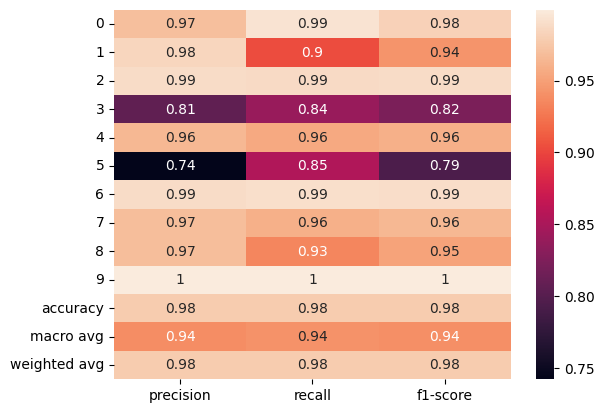

In [64]:
svc=svm.LinearSVC(C = 100, loss = 'hinge', penalty ='l2')
svc.fit(X_train, class2_train)
eval_metrics(svc, X_train, class2_train)


Model Accuracy:
 0.9772389151748695

Confusion matrix:
 [[83589   239     9     6   113   156    11    10     7    25]
 [ 2354 23022   103     2    22    14     0     0     0     1]
 [    1    44 13292     0    73     0    41     0     0     0]
 [    3    35     0   164     1     0     0     0     0     0]
 [  162    44     0    35  6042     2     5    30     0     0]
 [   71     3     0     0     0   481     0     0     0     7]
 [    0     2    35     0     2     0  4388     0     0     0]
 [   23     1     0     1    18     0     0   976     0     0]
 [    6     0     0     0     0     0     0     0    85     0]
 [   12     3     0     0     0     1     0     0     0 28236]]

Classification report:
 {'0': {'precision': 0.9694737940872873, 'recall': 0.993156300124755, 'f1-score': 0.9811721620320919, 'support': 84165.0}, '1': {'precision': 0.9841405548668405, 'recall': 0.9021866917470022, 'f1-score': 0.9413833289035186, 'support': 25518.0}, '2': {'precision': 0.9890616861373615, 'rec

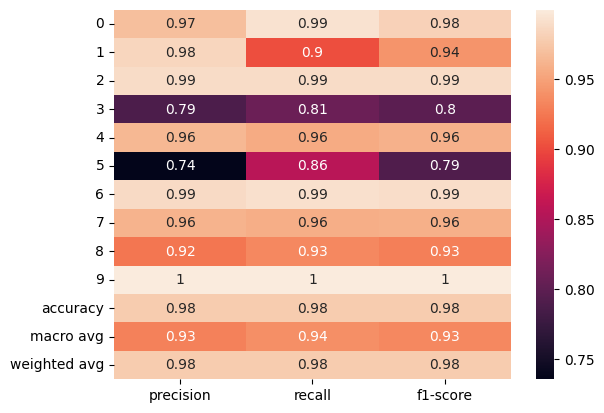

In [65]:
results_9_svm = eval_metrics(svc, X_test, class2_test)

### NB


Model Accuracy:
 0.7583894663514377

Confusion matrix:
 [[200338 100729   9534   3086   9306   5871   3297   1194    656   2649]
 [  4925  88587   5015    194   2884    121    158     39    100     49]
 [   165      2  50772    530     40     24   2097    122     14     39]
 [     5    110      0    673      3     16      0      6      0      0]
 [    39   1466      1    502  22260     18      0    910     78      2]
 [  1229    102      0      2      0    908      0      5      1      0]
 [   124     15     77     14      8     85  17310     67      7      0]
 [     1      0      0      1      7      0      0   4059      7      0]
 [     0      0      0      0      0      0      0      0    367      0]
 [   219     27    261      0      0    159      0      0     90 112253]]

Classification report:
 {'0': {'precision': 0.9676060759738221, 'recall': 0.5950751500029704, 'f1-score': 0.7369363901380345, 'support': 336660.0}, '1': {'precision': 0.4637140254818413, 'recall': 0.867887373618

{'0': {'precision': 0.9676060759738221,
  'recall': 0.5950751500029704,
  'f1-score': 0.7369363901380345,
  'support': 336660.0},
 '1': {'precision': 0.4637140254818413,
  'recall': 0.8678873736186221,
  'f1-score': 0.6044624884855515,
  'support': 102072.0},
 '2': {'precision': 0.7732561681388973,
  'recall': 0.9436297741845553,
  'f1-score': 0.8499895366843845,
  'support': 53805.0},
 '3': {'precision': 0.13454618152738904,
  'recall': 0.8277982779827798,
  'f1-score': 0.23147033533963884,
  'support': 813.0},
 '4': {'precision': 0.6450678103628145,
  'recall': 0.880677322361133,
  'f1-score': 0.7446808510638299,
  'support': 25276.0},
 '5': {'precision': 0.12607608997500694,
  'recall': 0.40409434801958166,
  'f1-score': 0.1921896496983808,
  'support': 2247.0},
 '6': {'precision': 0.7571516052838771,
  'recall': 0.9775794883379454,
  'f1-score': 0.8533609406196849,
  'support': 17707.0},
 '7': {'precision': 0.634020618556701,
  'recall': 0.9960736196319019,
  'f1-score': 0.77484012

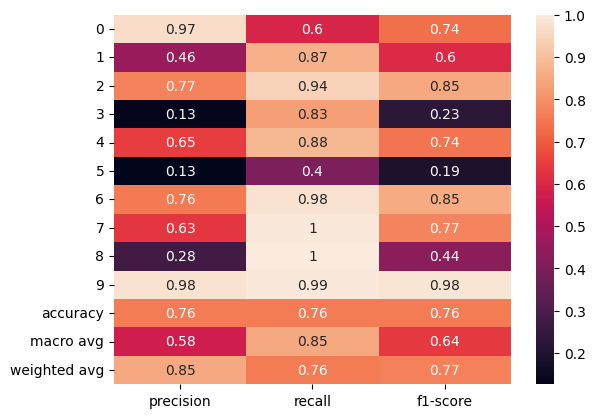

In [52]:
gnb = GaussianNB(var_smoothing= 0.001)
gnb.fit(X_train, class2_train)
eval_metrics(gnb, X_train , class2_train)


Model Accuracy:
 0.7587312814009073

Confusion matrix:
 [[50126 25004  2429   771  2353  1465   801   324   163   729]
 [ 1225 22162  1258    53   714    18    37     9    28    14]
 [   38     0 12683   142     6     3   543    25     2     9]
 [    2    33     0   166     0     2     0     0     0     0]
 [    6   386     0   128  5580     4     0   198    18     0]
 [  309    24     0     0     0   229     0     0     0     0]
 [   28     2    13     8     0    22  4333    20     1     0]
 [    1     0     0     0     1     0     0  1015     2     0]
 [    0     0     0     0     0     0     0     0    91     0]
 [   62     5    65     0     0    46     0     0    21 28053]]

Classification report:
 {'0': {'precision': 0.967739444369365, 'recall': 0.595568229073843, 'f1-score': 0.7373530839499272, 'support': 84165.0}, '1': {'precision': 0.4654317876344086, 'recall': 0.8684849909867545, 'f1-score': 0.6060655782536167, 'support': 25518.0}, '2': {'precision': 0.7710967898832685, 'reca

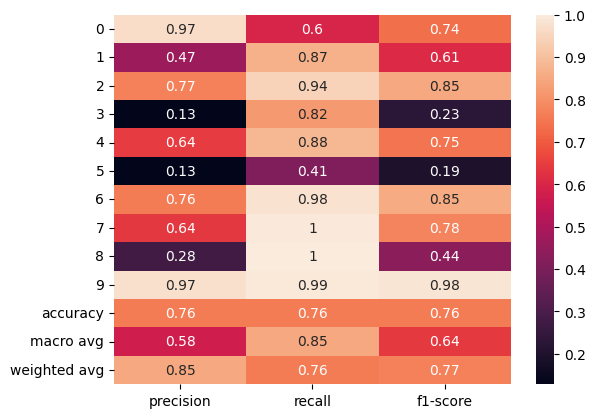

In [53]:
results_9_nb = eval_metrics(gnb, X_test , class2_test)

### XGBoost

In [46]:
xgb_model = xgb.XGBClassifier()

params = { 
    'model__max_depth': [3,4],
    'model__learning_rate': [ 0.01, 0.1, 1 ],
    "model__gamma":[0, 0.25, 0.5, 0.75, 1],
    'model__n_estimators': [50 ,100, 300, 500],
    #"model__subsample":[0.9],
    #"model__colsample_bytree":[0.5],
    #"model__early_stopping_rounds": [10], 
}


grid_search = GridSearchCV(xgb_model, param_grid = params, cv =StratifiedKFold(5), verbose = 3)
model = grid_search.fit(X_train, class2_train)
print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.993 total time= 4.4min
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.993 total time= 4.0min
[CV 3/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.993 total time= 1.8min
[CV 4/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.993 total time= 2.0min
[CV 5/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.993 total time= 2.0min
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.993 total time= 3.4min
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.993 total time= 2.3min
[CV 3/5] EN


Model Accuracy:
 0.9928722989122482

Confusion matrix:
 [[83903   187     1     1    16    51     0     2     0     4]
 [  615 24899     0     0     3     1     0     0     0     0]
 [    0     0 13439     0     0     0    12     0     0     0]
 [    2     9     0   191     1     0     0     0     0     0]
 [  128     0     0     1  6182     0     0     9     0     0]
 [   98     0     0     0     0   464     0     0     0     0]
 [    1     0    14     1     0     0  4411     0     0     0]
 [    2     0     0     0     9     0     0  1008     0     0]
 [    0     0     0     0     0     0     0     0    91     0]
 [    1     0     0     0     0     0     0     0     0 28251]]


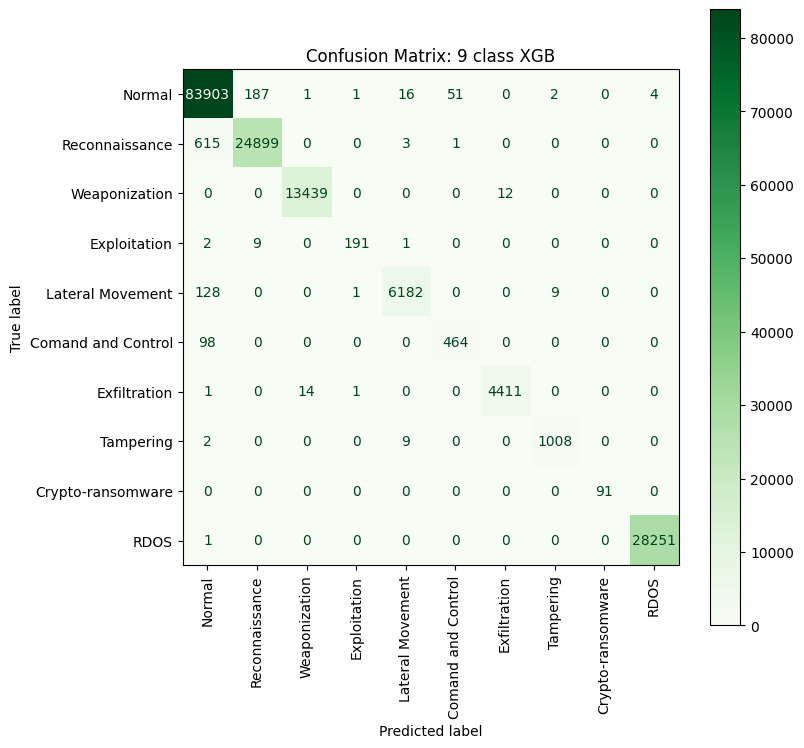


Classification report:
 {'0': {'precision': 0.9900058997050147, 'recall': 0.996887067070635, 'f1-score': 0.9934345676819701, 'support': 84165.0}, '1': {'precision': 0.992189679218968, 'recall': 0.9757426130574497, 'f1-score': 0.9838974176594947, 'support': 25518.0}, '2': {'precision': 0.9988850899360785, 'recall': 0.9991078730205932, 'f1-score': 0.9989964690577959, 'support': 13451.0}, '3': {'precision': 0.9845360824742269, 'recall': 0.9408866995073891, 'f1-score': 0.9622166246851385, 'support': 203.0}, '4': {'precision': 0.9953308645950733, 'recall': 0.9781645569620253, 'f1-score': 0.9866730508339319, 'support': 6320.0}, '5': {'precision': 0.8992248062015504, 'recall': 0.8256227758007118, 'f1-score': 0.8608534322820037, 'support': 562.0}, '6': {'precision': 0.9972869093375537, 'recall': 0.9963858143212108, 'f1-score': 0.9968361581920904, 'support': 4427.0}, '7': {'precision': 0.9892051030421982, 'recall': 0.9892051030421982, 'f1-score': 0.9892051030421982, 'support': 1019.0}, '8': {'

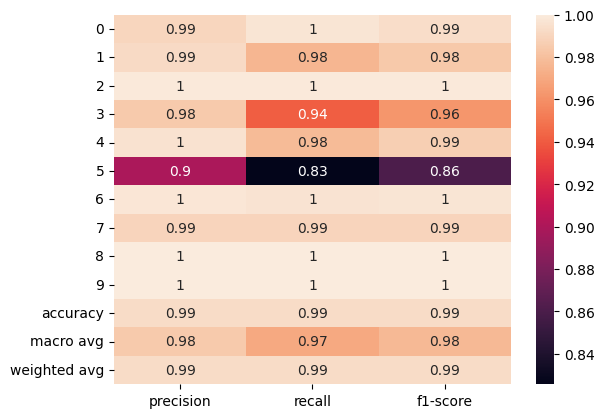

In [55]:
xgb_model = xgb.XGBClassifier(model__gamma = 0, model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)
xgb_model.fit(X_train, class2_train)
xgb_results_9 = eval_metrics(xgb_model, X_test, class2_test, attacks_9, "Confusion Matrix: 9 class XGB")

### RF


In [46]:
rfc=RandomForestClassifier()


parameter_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth' : [30, 40],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.993 total time=46.8min
[CV 2/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.993 total time=43.5min
[CV 3/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.993 total time=43.1min
[CV 4/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.993 total time=42.9min
[CV 5/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.993 total time=42.9min
[CV 1/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.993 total time=85.6min
[CV 2/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.993 total time=86.1min
[CV 3/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.993 total time=86.8min
[CV 4/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.993 total time=85.7min
[CV 5/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.993


Model Accuracy:
 0.9934454416857714

Confusion matrix:
 [[83929   156     2     0     6    65     0     2     0     5]
 [  498 25014     0     1     4     1     0     0     0     0]
 [    0     0 13432     0     0     0    19     0     0     0]
 [    2     7     0   193     1     0     0     0     0     0]
 [  139     2     0     0  6159     0     0    20     0     0]
 [  108     0     0     0     0   454     0     0     0     0]
 [    1     0    10     1     0     0  4415     0     0     0]
 [    5     0     0     0    17     0     0   997     0     0]
 [    1     0     0     0     0     0     0     0    90     0]
 [    2     0     0     0     0     0     0     0     0 28250]]


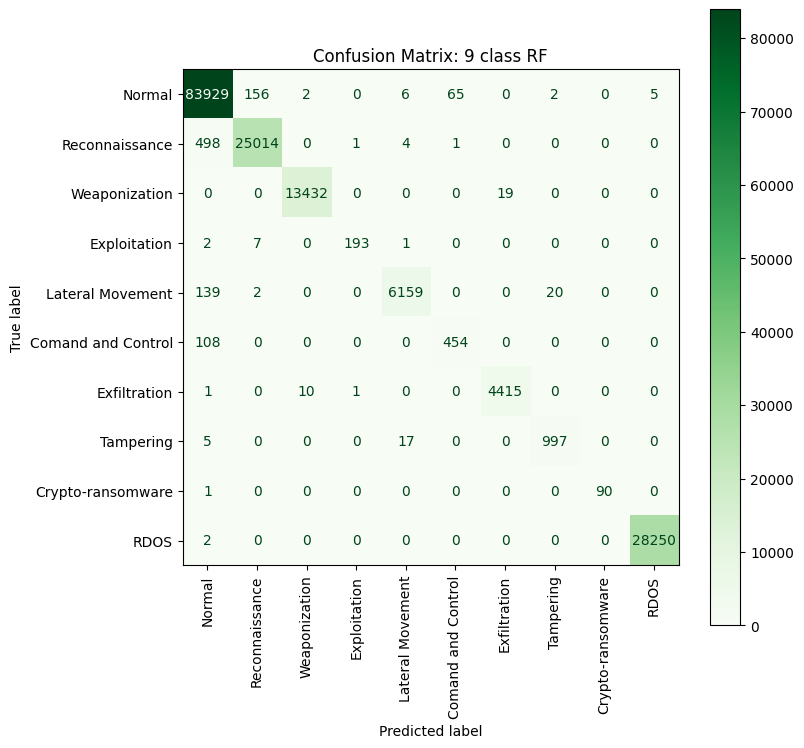


Classification report:
 {'0': {'precision': 0.9910727991970243, 'recall': 0.9971959840788926, 'f1-score': 0.9941249629848978, 'support': 84165.0}, '1': {'precision': 0.9934469200524246, 'recall': 0.9802492358335293, 'f1-score': 0.9868039528966212, 'support': 25518.0}, '2': {'precision': 0.9991074085093722, 'recall': 0.9985874656159394, 'f1-score': 0.9988473693995167, 'support': 13451.0}, '3': {'precision': 0.9897435897435898, 'recall': 0.9507389162561576, 'f1-score': 0.9698492462311559, 'support': 203.0}, '4': {'precision': 0.9954743817682237, 'recall': 0.9745253164556962, 'f1-score': 0.9848884624610218, 'support': 6320.0}, '5': {'precision': 0.8730769230769231, 'recall': 0.8078291814946619, 'f1-score': 0.8391866913123844, 'support': 562.0}, '6': {'precision': 0.9957149300857014, 'recall': 0.997289360740908, 'f1-score': 0.9965015235300756, 'support': 4427.0}, '7': {'precision': 0.9784102060843964, 'recall': 0.9784102060843964, 'f1-score': 0.9784102060843964, 'support': 1019.0}, '8': {

{'0': {'precision': 0.9910727991970243,
  'recall': 0.9971959840788926,
  'f1-score': 0.9941249629848978,
  'support': 84165.0},
 '1': {'precision': 0.9934469200524246,
  'recall': 0.9802492358335293,
  'f1-score': 0.9868039528966212,
  'support': 25518.0},
 '2': {'precision': 0.9991074085093722,
  'recall': 0.9985874656159394,
  'f1-score': 0.9988473693995167,
  'support': 13451.0},
 '3': {'precision': 0.9897435897435898,
  'recall': 0.9507389162561576,
  'f1-score': 0.9698492462311559,
  'support': 203.0},
 '4': {'precision': 0.9954743817682237,
  'recall': 0.9745253164556962,
  'f1-score': 0.9848884624610218,
  'support': 6320.0},
 '5': {'precision': 0.8730769230769231,
  'recall': 0.8078291814946619,
  'f1-score': 0.8391866913123844,
  'support': 562.0},
 '6': {'precision': 0.9957149300857014,
  'recall': 0.997289360740908,
  'f1-score': 0.9965015235300756,
  'support': 4427.0},
 '7': {'precision': 0.9784102060843964,
  'recall': 0.9784102060843964,
  'f1-score': 0.9784102060843964

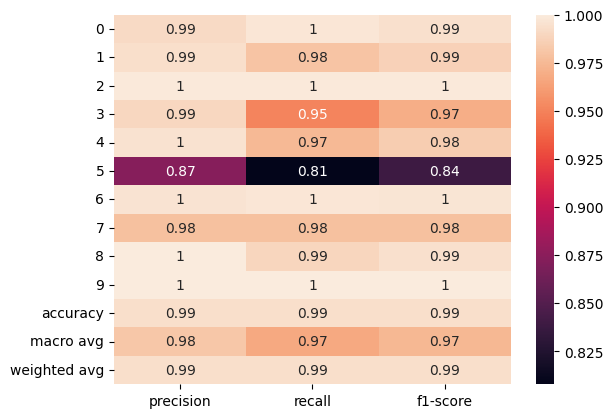

In [54]:
rfc=RandomForestClassifier(  criterion = 'entropy', max_depth =  40, n_estimators = 300)
rfc.fit(X_train, class2_train)
rf_results_9 = eval_metrics(rfc, X_test , class2_test,  attacks_9, "Confusion Matrix: 9 class RF")


Model Accuracy:
 0.9934454416857714

Confusion matrix:
 [[83929   156     2     0     6    65     0     2     0     5]
 [  498 25014     0     1     4     1     0     0     0     0]
 [    0     0 13432     0     0     0    19     0     0     0]
 [    2     7     0   193     1     0     0     0     0     0]
 [  139     2     0     0  6159     0     0    20     0     0]
 [  108     0     0     0     0   454     0     0     0     0]
 [    1     0    10     1     0     0  4415     0     0     0]
 [    5     0     0     0    17     0     0   997     0     0]
 [    1     0     0     0     0     0     0     0    90     0]
 [    2     0     0     0     0     0     0     0     0 28250]]


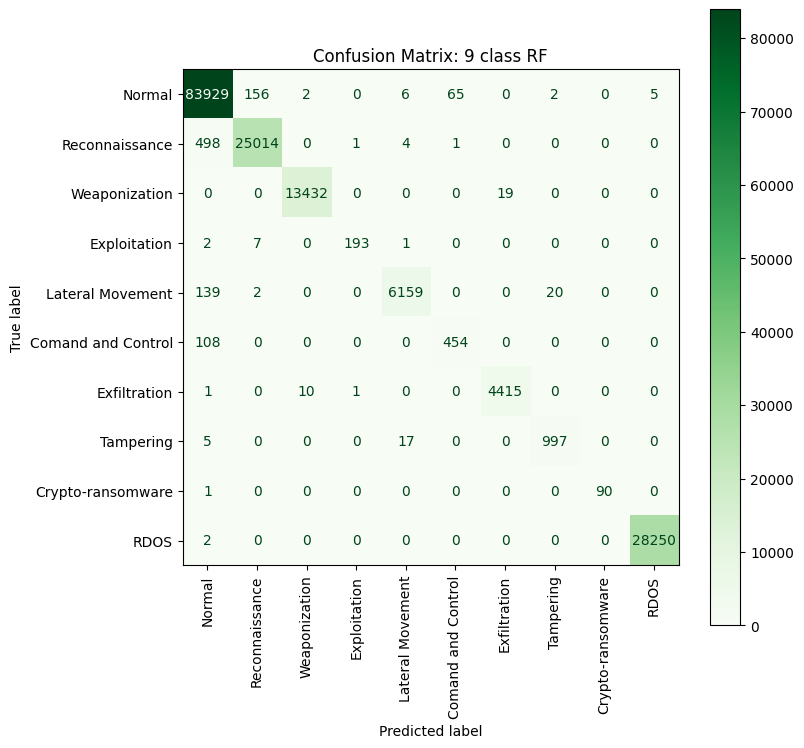


Classification report:
 {'0': {'precision': 0.9910727991970243, 'recall': 0.9971959840788926, 'f1-score': 0.9941249629848978, 'support': 84165.0}, '1': {'precision': 0.9934469200524246, 'recall': 0.9802492358335293, 'f1-score': 0.9868039528966212, 'support': 25518.0}, '2': {'precision': 0.9991074085093722, 'recall': 0.9985874656159394, 'f1-score': 0.9988473693995167, 'support': 13451.0}, '3': {'precision': 0.9897435897435898, 'recall': 0.9507389162561576, 'f1-score': 0.9698492462311559, 'support': 203.0}, '4': {'precision': 0.9954743817682237, 'recall': 0.9745253164556962, 'f1-score': 0.9848884624610218, 'support': 6320.0}, '5': {'precision': 0.8730769230769231, 'recall': 0.8078291814946619, 'f1-score': 0.8391866913123844, 'support': 562.0}, '6': {'precision': 0.9957149300857014, 'recall': 0.997289360740908, 'f1-score': 0.9965015235300756, 'support': 4427.0}, '7': {'precision': 0.9784102060843964, 'recall': 0.9784102060843964, 'f1-score': 0.9784102060843964, 'support': 1019.0}, '8': {

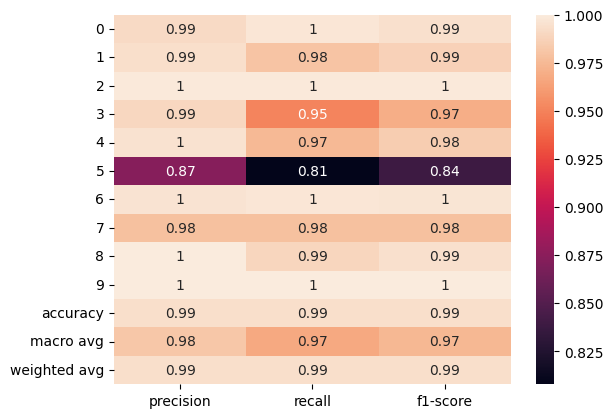

In [56]:
rf_results_9 = eval_metrics(rfc, X_test , class2_test,  attacks_9, "Confusion Matrix: 9 class RF")

## Multiclass 19

In [49]:
attacks_19 = ["Normal", "RDOS" , "Scanning vulnerability", "Generic scanning", "Brute Force", "MQTT cloud broker subscription" , "Discovering Resources", 
               "Exfiltration", "Insider Malcious", "Modbus Register Reading", "False Data Injection", "Command and Control", "Dictionary",
               "TCP Relay", "Fuzzing" , "Reverse shell" , "Crypto Ransomware"]


### DT


Model Accuracy:
 0.99994664886263

Confusion matrix:
 [[336642      0      0      0      0      0     18      0      0      0
       0      0      0      0      0      0      0]
 [     0 113009      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0  42282      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     1      0      0  40221      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0  37793      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0      0  18819      0      0      0      0
       0      0      0      0      0      0      0]
 [    15      0      0      0      0      0  18503      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0  17707      0      0
     

{'0': {'precision': 0.9999495038005816,
  'recall': 0.9999465335947246,
  'f1-score': 0.9999480186954475,
  'support': 336660.0},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 113009.0},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 42282.0},
 '3': {'precision': 1.0,
  'recall': 0.9999751379841878,
  'f1-score': 0.9999875688375621,
  'support': 40222.0},
 '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 37793.0},
 '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18819.0},
 '6': {'precision': 0.9990281302305491,
  'recall': 0.999189977319365,
  'f1-score': 0.9991090472204973,
  'support': 18518.0},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17707.0},
 '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13954.0},
 '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4762.0},
 '10': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4075.0},
 '11

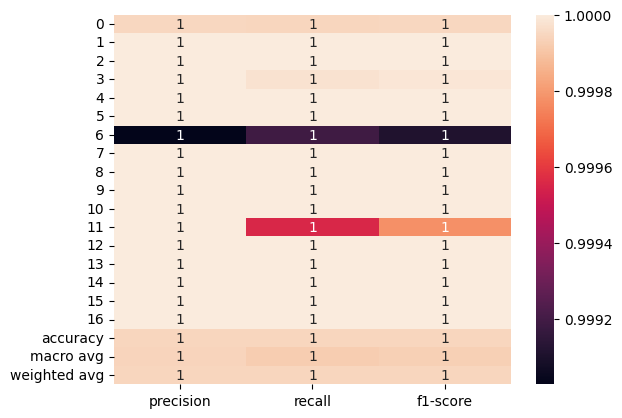

In [54]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)
dt.fit(X_train, y_train)

eval_metrics(dt, X_train , y_train)


Model Accuracy:
 0.9882627676698698

Confusion matrix:
 [[83194     7    33    10     3     9   526    16     3     4     8   117
      2   121    97    13     2]
 [    3 28247     0     0     0     0     1     0     0     0     0     1
      0     0     0     0     0]
 [   20     0 10518    21     2     0     0     4     2     0     0     0
      0     2     0     1     0]
 [    8     0    18 10018     0     5     1     0     0     0     0     0
      0     2     0     3     0]
 [    0     0     0     0  9447     0     0     0     1     0     0     0
      0     0     0     0     0]
 [    7     0     1     1     0  4671     0     0     0     0    24     0
      0     0     0     1     0]
 [  378     0     0     0     0     0  4248     0     0     0     0     4
      0     0     0     0     0]
 [    9     0     0     0     0     1     0  4402    15     0     0     0
      0     0     0     0     0]
 [    3     0     0     0     0     0     0    11  3475     0     0     0
      0     0

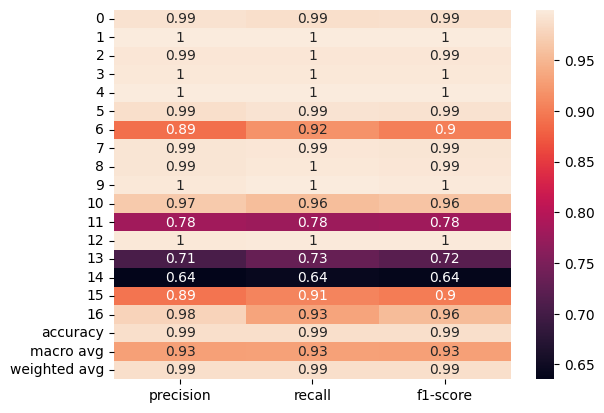

In [55]:
results_19_dt =  eval_metrics(dt, X_test , y_test)

### KNN


Model Accuracy:
 0.9999939027271577

Confusion matrix:
 [[336659      0      0      0      0      0      1      0      0      0
       0      0      0      0      0      0      0]
 [     0 113009      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0  42282      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     1      0      0  40221      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0  37793      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0      0  18819      0      0      0      0
       0      0      0      0      0      0      0]
 [     1      0      0      0      0      0  18517      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0  17707      0      0
   

{'0': {'precision': 0.9999910889853919,
  'recall': 0.9999970296441514,
  'f1-score': 0.9999940593059489,
  'support': 336660.0},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 113009.0},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 42282.0},
 '3': {'precision': 1.0,
  'recall': 0.9999751379841878,
  'f1-score': 0.9999875688375621,
  'support': 40222.0},
 '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 37793.0},
 '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18819.0},
 '6': {'precision': 0.9999459984879576,
  'recall': 0.9999459984879576,
  'f1-score': 0.9999459984879576,
  'support': 18518.0},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17707.0},
 '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13954.0},
 '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4762.0},
 '10': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4075.0},
 '1

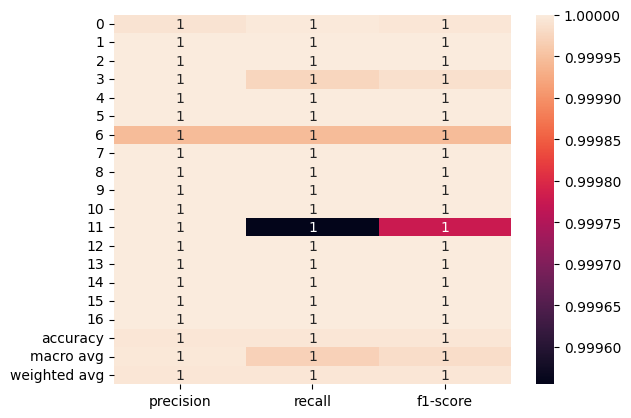

In [56]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, y_train)
eval_metrics(knn, X_train , y_train)


Model Accuracy:
 0.9810984830008292

Confusion matrix:
 [[82519    44    64    27    44    67   574   295   389     2    10    68
      9    28    24     0     1]
 [    0 28252     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   18     0 10551     0     0     1     0     0     0     0     0     0
      0     0     0     0     0]
 [   10     0     1 10041     0     3     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0  9448     0     0     0     0     0     0     0
      0     0     0     0     0]
 [  125     0     0     7     0  4548     0     0     0     0    24     0
      0     0     0     1     0]
 [  342     0     0     0     0     0  4286     0     0     0     0     2
      0     0     0     0     0]
 [   40     0     0     1     0     0     0  4378     8     0     0     0
      0     0     0     0     0]
 [   13     0     0     0     0     0     0     5  3471     0     0     0
      0     0

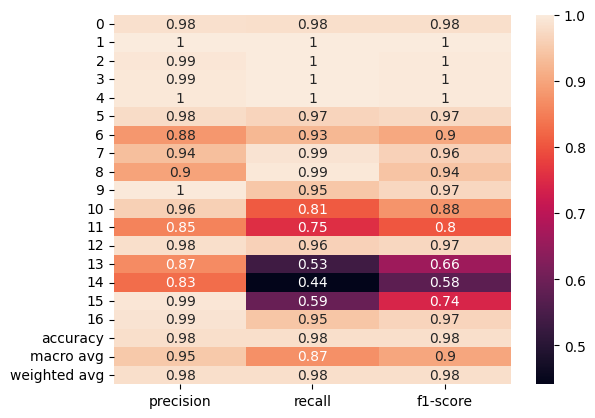

In [57]:
results_19_knn = eval_metrics(knn, X_test , y_test)

### LR


Model Accuracy:
 0.9769858436567784

Confusion matrix:
 [[334978    144     86    133     12     16    539     12      9      5
      38    331      1    175    148      6     27]
 [    25 112914      0      0      0      0     70      0      0      0
       0      0      0      0      0      0      0]
 [   105      0  39796   2170    175     18      0      0      1      0
       0      4      0      9      2      2      0]
 [   119      0   1006  39034      0     62      0      0      0      0
       0      0      0      1      0      0      0]
 [     3      0      1      0  37789      0      0      0      0      0
       0      0      0      0      0      0      0]
 [    16      0      5      5      0  18677      0      0      0      0
     115      0      0      0      0      1      0]
 [  7045     11      0      6      0      0  11449      0      0      0
       0      7      0      0      0      0      0]
 [    10      0      4      1     14      0      0  17537    140      0
   

{'0': {'precision': 0.9733686287386348,
  'recall': 0.9950038614626032,
  'f1-score': 0.9840673440040658,
  'support': 336660.0},
 '1': {'precision': 0.9986291556483209,
  'recall': 0.999159358989107,
  'f1-score': 0.9988941869620219,
  'support': 113009.0},
 '2': {'precision': 0.9698535325226038,
  'recall': 0.9412042949718556,
  'f1-score': 0.9553141691172058,
  'support': 42282.0},
 '3': {'precision': 0.9424404848133662,
  'recall': 0.9704639252150564,
  'f1-score': 0.9562469377756002,
  'support': 40222.0},
 '4': {'precision': 0.9946829512252902,
  'recall': 0.9998941602942344,
  'f1-score': 0.9972817481262535,
  'support': 37793.0},
 '5': {'precision': 0.9910325798577948,
  'recall': 0.9924544343482651,
  'f1-score': 0.9917429974777645,
  'support': 18819.0},
 '6': {'precision': 0.9480003312080815,
  'recall': 0.6182633113727184,
  'f1-score': 0.7484229449256414,
  'support': 18518.0},
 '7': {'precision': 0.9934288789440888,
  'recall': 0.9903992771220421,
  'f1-score': 0.99191176

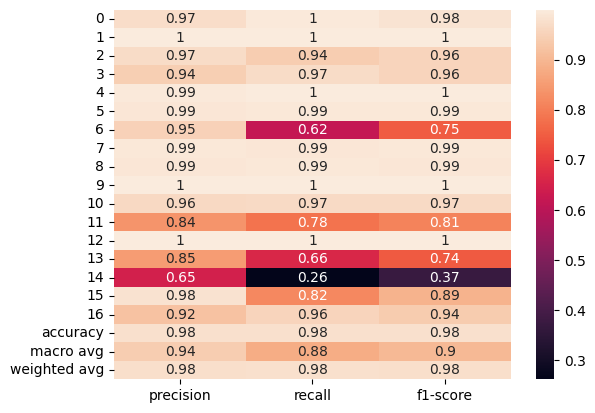

In [58]:
clf = LogisticRegression( C = 1000, penalty = 'l2')
clf.fit(X_train, y_train)
eval_metrics(clf, X_train , y_train)


Model Accuracy:
 0.9766291888200576

Confusion matrix:
 [[83715    45    21    37     3     3   127     3     2     3    14    91
      0    49    44     2     6]
 [    6 28232     0     0     0     0    14     0     0     0     0     0
      0     0     0     0     0]
 [   24     0  9979   527    34     3     0     0     0     0     0     1
      0     1     1     0     0]
 [   28     0   267  9745     0    15     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0  9448     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   11     0     1     0     0  4663     0     0     0     0    30     0
      0     0     0     0     0]
 [ 1804     2     0     1     0     0  2822     0     0     0     0     1
      0     0     0     0     0]
 [    0     0     1     0     0     1     0  4394    30     0     0     0
      0     0     0     0     1]
 [    1     0     0     0     0     0     0    40  3448     0     0     0
      0     0

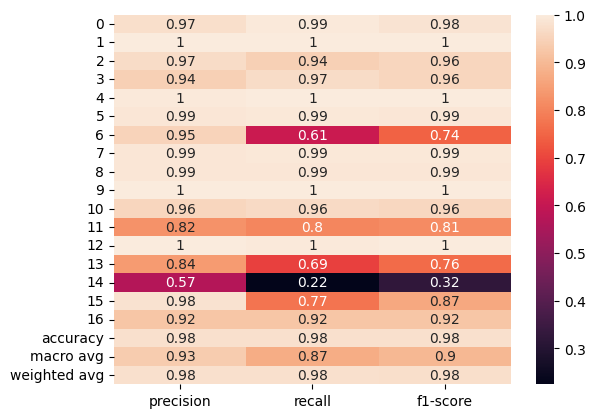

In [59]:
results_19_lr = eval_metrics(clf, X_test , y_test)

### SVM

In [63]:
svc=svm.LinearSVC()

parameter_grid = {'C': [ 10, 100],
              'loss': ['hinge','squared_hinge']}

grid_search = GridSearchCV(svc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..................C=10, loss=hinge;, score=0.974 total time=21.6min
[CV 2/5] END ..................C=10, loss=hinge;, score=0.976 total time=21.2min
[CV 3/5] END ..................C=10, loss=hinge;, score=0.975 total time=22.1min
[CV 4/5] END ..................C=10, loss=hinge;, score=0.976 total time=22.5min
[CV 5/5] END ..................C=10, loss=hinge;, score=0.975 total time=22.7min
[CV 1/5] END ..........C=10, loss=squared_hinge;, score=0.971 total time=23.8min
[CV 2/5] END ..........C=10, loss=squared_hinge;, score=0.973 total time=23.1min
[CV 3/5] END ..........C=10, loss=squared_hinge;, score=0.971 total time=24.6min
[CV 4/5] END ..........C=10, loss=squared_hinge;, score=0.974 total time=24.9min
[CV 5/5] END ..........C=10, loss=squared_hinge;, score=0.974 total time=24.9min
[CV 1/5] END .................C=100, loss=hinge;, score=0.970 total time=29.1min
[CV 2/5] END .................C=100, loss=hinge;,


Model Accuracy:
 0.9760758256850667

Confusion matrix:
 [[335203     76     84     65     10      5    107    151      7    223
      66    501    117      3     33      6      3]
 [    81 112928      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [    83      0  40141   1732     26     17      0      0      0      4
       0      9    257      8      3      2      0]
 [   114      0   1137  38905      0     56      0      0      0      0
       0      0     10      0      0      0      0]
 [     3      0    151      0  37639      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     6      0      6      6      2  18742      1      4      0      0
      51      0      0      0      1      0      0]
 [  7954      1      0      0      0      0  10551      0      0      0
       0     12      0      0      0      0      0]
 [    15      0      3      0     14      0      0  17584     91      0
   

{'0': {'precision': 0.9701659281470054,
  'recall': 0.9956721915285451,
  'f1-score': 0.9827535911083878,
  'support': 336660.0},
 '1': {'precision': 0.9993186142206097,
  'recall': 0.9992832429275544,
  'f1-score': 0.9993009282610811,
  'support': 113009.0},
 '2': {'precision': 0.9650206750649101,
  'recall': 0.9493637954685209,
  'f1-score': 0.9571282100193138,
  'support': 42282.0},
 '3': {'precision': 0.9540917674179071,
  'recall': 0.9672567251752772,
  'f1-score': 0.9606291435696737,
  'support': 40222.0},
 '4': {'precision': 0.9984349302350257,
  'recall': 0.9959251713280237,
  'f1-score': 0.9971784716058868,
  'support': 37793.0},
 '5': {'precision': 0.9915877466800699,
  'recall': 0.9959083904564536,
  'f1-score': 0.9937433722163308,
  'support': 18819.0},
 '6': {'precision': 0.9897748592870544,
  'recall': 0.5697699535586996,
  'f1-score': 0.7232161217355542,
  'support': 18518.0},
 '7': {'precision': 0.9863136638994839,
  'recall': 0.9930535946235952,
  'f1-score': 0.9896721

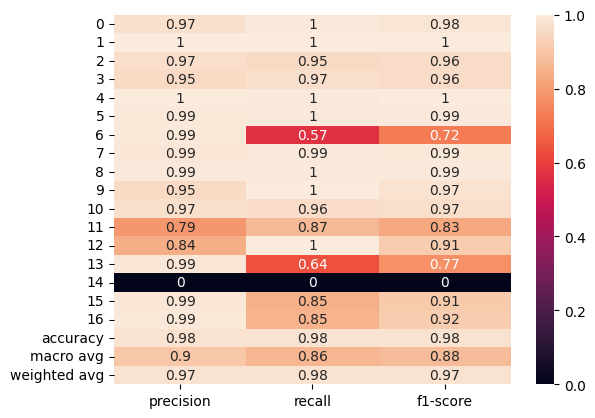

In [66]:
svc=svm.LinearSVC(C = 10, loss = 'hinge')
svc.fit(X_train, y_train)
eval_metrics(svc, X_train, y_train)


Model Accuracy:
 0.9755682649626848

Confusion matrix:
 [[83744    29    27    20     7     2    27    40     1    61    15   141
     41     0     6     2     2]
 [   14 28237     0     0     0     0     1     0     0     0     0     0
      0     0     0     0     0]
 [   21     0 10053   421     7     3     0     0     0     0     0     3
     58     3     1     0     0]
 [   23     0   295  9719     0    14     0     0     0     0     0     0
      4     0     0     0     0]
 [    0     0    36     0  9412     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0  4682     0     5     0     0    15     0
      1     0     2     0     0]
 [ 2024     0     0     0     0     0  2603     0     0     0     0     3
      0     0     0     0     0]
 [    0     0     0     0     0     1     0  4399    27     0     0     0
      0     0     0     0     0]
 [    4     0     0     0     2     0     0     8  3475     0     0     0
      0     0

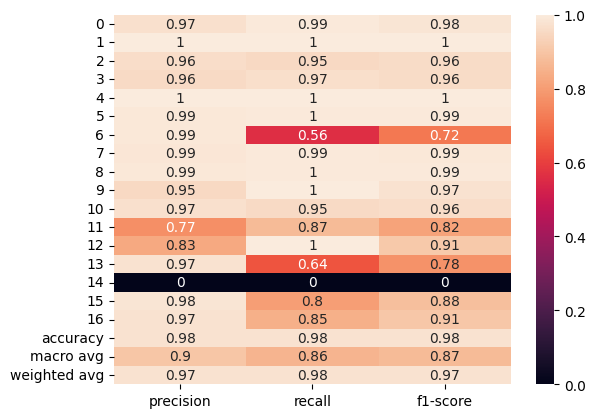

In [67]:
results_19_svm = eval_metrics(svc, X_test , y_test)

### NB

In [60]:
gnb_clf = GaussianNB()

parameter_grid = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
                 }

grid_search = GridSearchCV(gnb_clf, param_grid = parameter_grid, 
                          cv =StratifiedKFold(7), verbose = 2)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 14 candidates, totalling 98 fits
[CV] END .................................var_smoothing=0.01; total time=   1.3s
[CV] END .................................var_smoothing=0.01; total time=   1.4s
[CV] END .................................var_smoothing=0.01; total time=   1.4s
[CV] END .................................var_smoothing=0.01; total time=   1.3s
[CV] END .................................var_smoothing=0.01; total time=   1.2s
[CV] END .................................var_smoothing=0.01; total time=   1.3s
[CV] END .................................var_smoothing=0.01; total time=   1.2s
[CV] END ................................var_smoothing=0.001; total time=   1.4s
[CV] END ................................var_smoothing=0.001; total time=   1.4s
[CV] END ................................var_smoothing=0.001; total time=   1.4s
[CV] END ................................var_smoothing=0.001; total time=   1.2s
[CV] END ................................var_smo


Model Accuracy:
 0.6728614958744328

Confusion matrix:
 [[155586   2117   6490     30   7420   5635 114108   3291   2616    549
    1138   5770    302   2945  25167   3071    425]
 [   288 112303     45      0      0      0    112      0      0      0
       0    159      0      0      0      0    102]
 [   198      0  17857  18921   3819    111      0    148      0      0
       6     15    466    120    620      1      0]
 [   149      0   2035  37545      0    310      0      0      0      0
       0    136      0     35      0     10      2]
 [   460      0    160      0  36515      0     56      0      0      0
     103      0      0      0      0    499      0]
 [    28      2      3      0      0  18415      0      0      0      0
     323     12      0      0      0     19     17]
 [   641     30      4      0      0      0  17579      0      3      0
      26     58      0      0      0    105     72]
 [   137      0      2      3      7     10     31  17149    194      0
   

{'0': {'precision': 0.9811508749802932,
  'recall': 0.4621457850650508,
  'f1-score': 0.628332003998102,
  'support': 336660.0},
 '1': {'precision': 0.9811721330094882,
  'recall': 0.9937527099611535,
  'f1-score': 0.9874223513740454,
  'support': 113009.0},
 '2': {'precision': 0.6708114199849737,
  'recall': 0.4223310155621778,
  'f1-score': 0.5183303822820818,
  'support': 42282.0},
 '3': {'precision': 0.6632806289197067,
  'recall': 0.933444383670628,
  'f1-score': 0.7755068317721296,
  'support': 40222.0},
 '4': {'precision': 0.7642159017182563,
  'recall': 0.966184214007885,
  'f1-score': 0.8534134199640078,
  'support': 37793.0},
 '5': {'precision': 0.7440404040404041,
  'recall': 0.9785323343429513,
  'f1-score': 0.8453258050448714,
  'support': 18819.0},
 '6': {'precision': 0.1328883311662786,
  'recall': 0.9492925801922454,
  'f1-score': 0.23314014402992,
  'support': 18518.0},
 '7': {'precision': 0.8281740474235766,
  'recall': 0.9684870390241147,
  'f1-score': 0.892851564533

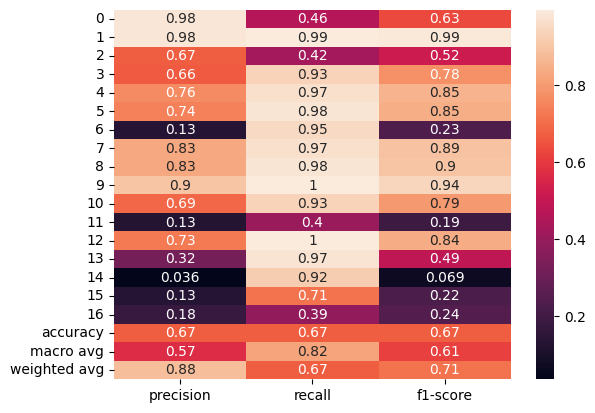

In [61]:
gnb = GaussianNB(var_smoothing= 0.001)
gnb.fit(X_train, y_train)
eval_metrics(gnb, X_train , y_train)


Model Accuracy:
 0.6735037315252914

Confusion matrix:
 [[38966   571  1613    10  1846  1399 28326   802   699   131   299  1434
     94   773  6329   766   107]
 [   67 28072    10     0     0     0    33     0     0     0     0    46
      0     0     0     0    24]
 [   57     0  4451  4725   957    26     0    37     0     0     0     4
    116    25   172     0     0]
 [   46     0   462  9426     0    78     0     0     0     0     0    29
      0     7     0     7     0]
 [  132     0    38     0  9112     0    15     0     0     0    18     0
      0     0     0   133     0]
 [    4     0     0     0     0  4620     0     0     0     0    66     1
      0     0     0     9     5]
 [  157     6     3     0     0     0  4404     0     0     0     8     8
      0     0     0    25    19]
 [   29     0     1     0     0     1     6  4294    45     0    20    22
      0     0     0     8     1]
 [   19     0     0     0     2     0     3    37  3409     0     6     4
      0     1

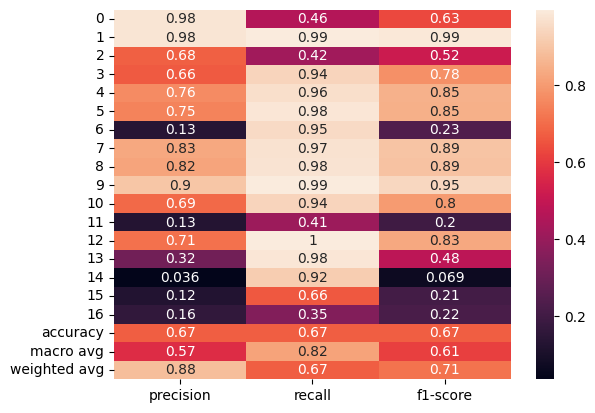

In [70]:
results_19_nb = eval_metrics(gnb, X_test , y_test)

### XGBoost

In [48]:
xgb_model = xgb.XGBClassifier()

params = { 
    'model__max_depth': [3],
    'model__learning_rate': [ 0.01, 0.1, 1 ],
    "model__gamma":[0, 0.25, 0.5, 0.75, 1],
    'model__n_estimators': [50 ,100, 300, 500],
    #"model__subsample":[0.9],
    #"model__colsample_bytree":[0.5],
    #"model__early_stopping_rounds": [10], 
}


grid_search = GridSearchCV(xgb_model, param_grid = params, cv =StratifiedKFold(5), verbose = 3)
model = grid_search.fit(X_train, y_train)
print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.993 total time= 6.9min
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.994 total time=19.9min
[CV 3/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.993 total time=18.5min
[CV 4/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.994 total time=17.0min
[CV 5/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.994 total time=15.5min
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.993 total time=20.4min
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.994 total time=20.1min
[CV 3/5] END


Model Accuracy:
 0.9937746939173698

Confusion matrix:
 [[83923     1     3     7     0     0   151     0     3     4     4    45
      0    18     5     1     0]
 [    2 28250     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    6     0 10558     0     0     4     0     0     0     0     0     2
      0     0     0     0     0]
 [   14     0     0 10034     0     7     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0  9448     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    2     0     0     0     0  4698     0     0     0     0     5     0
      0     0     0     0     0]
 [  422     0     0     0     0     0  4206     0     0     0     0     2
      0     0     0     0     0]
 [    4     0     0     0     0     0     0  4408    15     0     0     0
      0     0     0     0     0]
 [    1     0     0     0     0     0     0     6  3482     0     0     0
      0     0

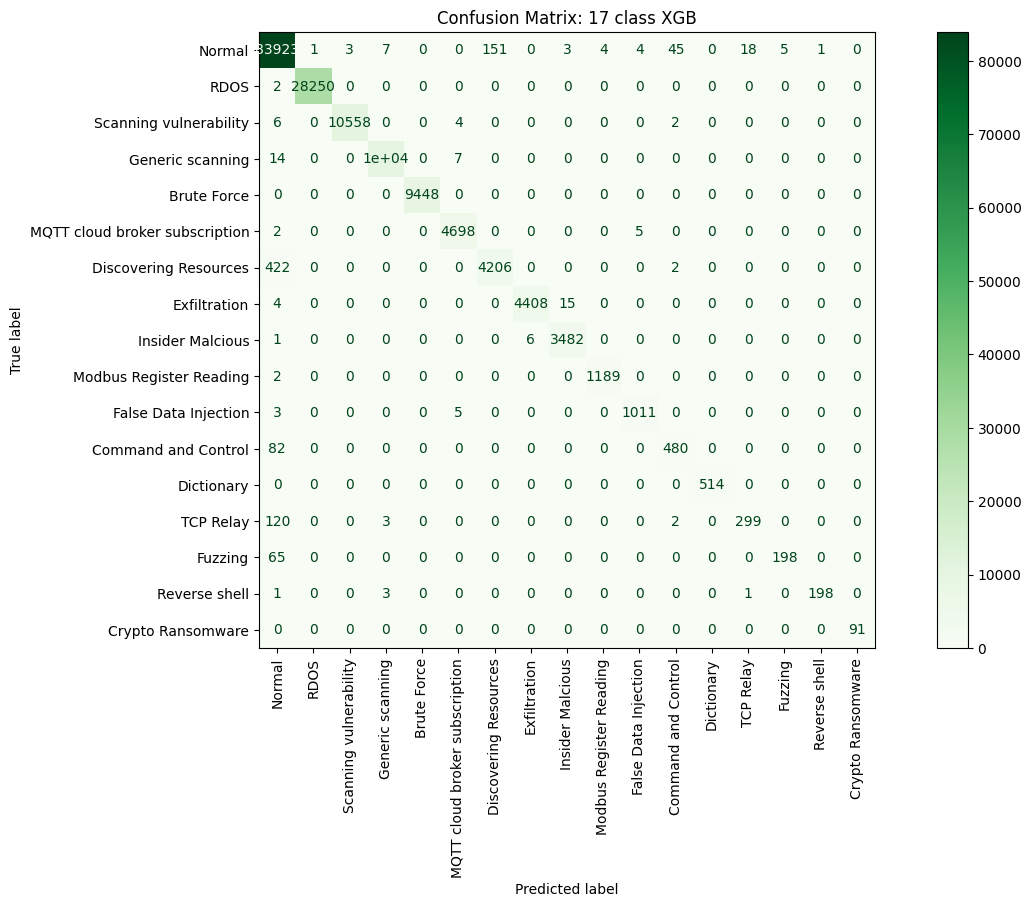


Classification report:
 {'0': {'precision': 0.9914468321381739, 'recall': 0.9971246955385256, 'f1-score': 0.9942776579863991, 'support': 84165.0}, '1': {'precision': 0.9999646030229018, 'recall': 0.9999292085516069, 'f1-score': 0.9999469054740456, 'support': 28252.0}, '2': {'precision': 0.9997159359909099, 'recall': 0.9988647114474929, 'f1-score': 0.9992901424447493, 'support': 10570.0}, '3': {'precision': 0.9987060814173385, 'recall': 0.9979114868224764, 'f1-score': 0.9983086260073625, 'support': 10055.0}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9448.0}, '5': {'precision': 0.996605854900297, 'recall': 0.9985122210414453, 'f1-score': 0.9975581271897228, 'support': 4705.0}, '6': {'precision': 0.9653431260041313, 'recall': 0.9084233261339093, 'f1-score': 0.9360186936686324, 'support': 4630.0}, '7': {'precision': 0.9986406887177164, 'recall': 0.9957081545064378, 'f1-score': 0.9971722655808167, 'support': 4427.0}, '8': {'precision': 0.9948571428571429, 'recall':

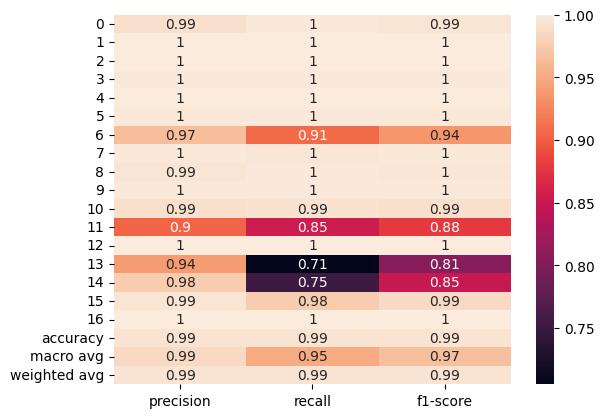

In [50]:
xgb_model = xgb.XGBClassifier(model__gamma = 0, model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)
xgb_model.fit(X_train, y_train)
xgb_results_9 = eval_metrics(xgb_model, X_test, y_test, attacks_19, "Confusion Matrix: 17 class XGB")

In [52]:
xgb_results_9

{'0': {'precision': 0.9914468321381739,
  'recall': 0.9971246955385256,
  'f1-score': 0.9942776579863991,
  'support': 84165.0},
 '1': {'precision': 0.9999646030229018,
  'recall': 0.9999292085516069,
  'f1-score': 0.9999469054740456,
  'support': 28252.0},
 '2': {'precision': 0.9997159359909099,
  'recall': 0.9988647114474929,
  'f1-score': 0.9992901424447493,
  'support': 10570.0},
 '3': {'precision': 0.9987060814173385,
  'recall': 0.9979114868224764,
  'f1-score': 0.9983086260073625,
  'support': 10055.0},
 '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9448.0},
 '5': {'precision': 0.996605854900297,
  'recall': 0.9985122210414453,
  'f1-score': 0.9975581271897228,
  'support': 4705.0},
 '6': {'precision': 0.9653431260041313,
  'recall': 0.9084233261339093,
  'f1-score': 0.9360186936686324,
  'support': 4630.0},
 '7': {'precision': 0.9986406887177164,
  'recall': 0.9957081545064378,
  'f1-score': 0.9971722655808167,
  'support': 4427.0},
 '8': {'precision': 0.99

### RF

In [48]:
rfc=RandomForestClassifier()


parameter_grid = {
    'n_estimators': [200, 300],
    'max_depth' : [30, 40],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.993 total time=114.6min
[CV 2/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.992 total time=113.6min
[CV 3/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.993 total time=96.4min
[CV 4/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.993 total time=95.2min
[CV 5/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.993 total time=90.1min
[CV 1/5] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.993 total time=134.1min
[CV 2/5] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.993 total time=138.4min
[CV 3/5] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.993 total time=162.8min
[CV 4/5] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.993 total time=71.5min
[CV 5/5] END criterion=entropy, max_depth=30, n_estimators=300;, score=

In [45]:
rfc=RandomForestClassifier()


parameter_grid = {
    'n_estimators': [200, 300],
    'max_depth' : [30],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.993 total time=107.2min
[CV 2/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.993 total time=304.3min
[CV 3/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.993 total time=60.7min
[CV 4/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.993 total time=94.4min
[CV 5/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.993 total time=98.1min
[CV 1/5] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.993 total time=158.5min
[CV 2/5] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.993 total time=150.9min
[CV 3/5] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.993 total time=146.0min
[CV 4/5] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.993 total time=147.0min
[CV 5/5] END criterion=entropy, max_depth=30, n_estimators=300;, score

In [46]:
rfc=RandomForestClassifier()


parameter_grid = {
    'n_estimators': [200, 300],
    'max_depth' : [40],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END criterion=entropy, max_depth=40, n_estimators=200;, score=0.993 total time=66.0min
[CV 2/5] END criterion=entropy, max_depth=40, n_estimators=200;, score=0.993 total time=105.1min
[CV 3/5] END criterion=entropy, max_depth=40, n_estimators=200;, score=0.993 total time=98.9min
[CV 4/5] END criterion=entropy, max_depth=40, n_estimators=200;, score=0.993 total time=91.6min
[CV 5/5] END criterion=entropy, max_depth=40, n_estimators=200;, score=0.993 total time=101.3min
[CV 1/5] END criterion=entropy, max_depth=40, n_estimators=300;, score=0.993 total time=162.4min
[CV 2/5] END criterion=entropy, max_depth=40, n_estimators=300;, score=0.993 total time=151.8min
[CV 3/5] END criterion=entropy, max_depth=40, n_estimators=300;, score=0.993 total time=151.4min
[CV 4/5] END criterion=entropy, max_depth=40, n_estimators=300;, score=0.993 total time=150.0min
[CV 5/5] END criterion=entropy, max_depth=40, n_estimators=300;, score


Model Accuracy:
 0.9933905663138384

Confusion matrix:
 [[83956     7     4     6     0     0   132     0     3     2     4    47
      0     1     3     0     0]
 [    3 28249     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   21     0 10516    24     0     5     0     0     0     0     0     0
      0     3     0     1     0]
 [   10     0     0 10037     0     8     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0  9448     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    3     0     0     1     0  4691     0     0     0     0    10     0
      0     0     0     0     0]
 [  377     0     0     0     0     0  4253     0     0     0     0     0
      0     0     0     0     0]
 [    5     0     0     0     0     0     0  4418     4     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     0     0     7  3482     0     0     0
      0     0

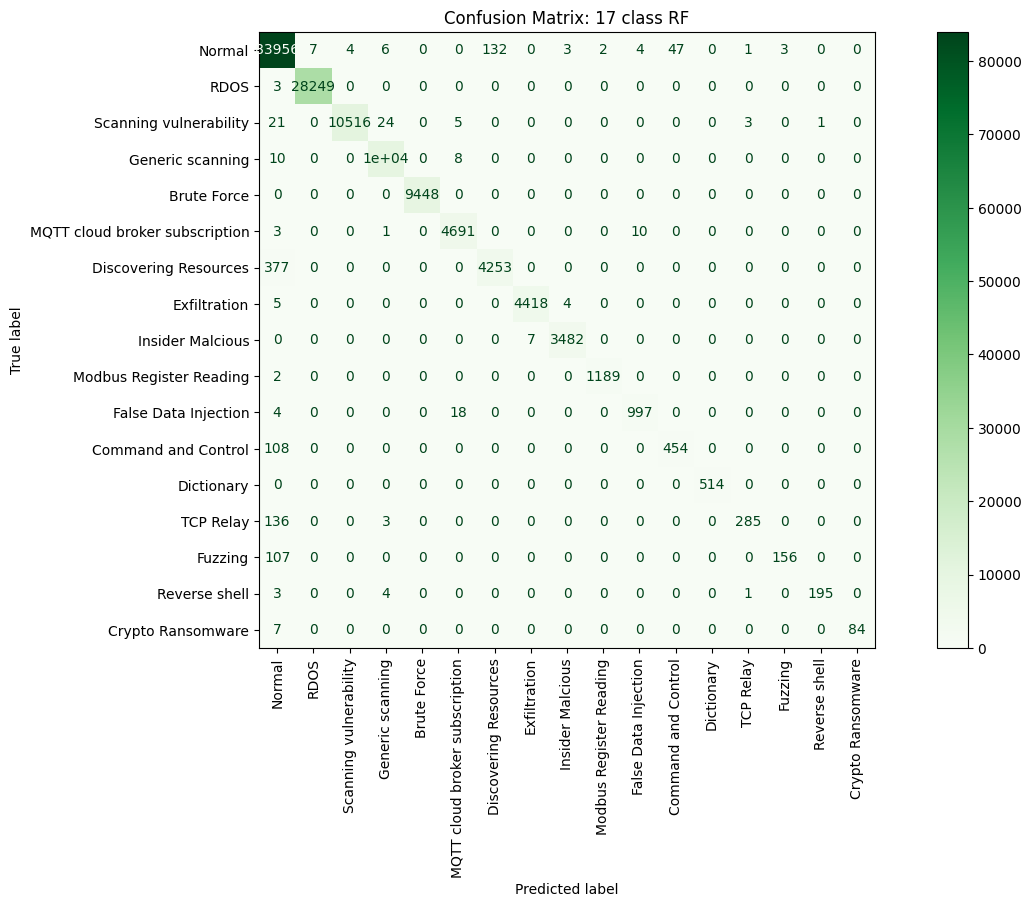


Classification report:
 {'0': {'precision': 0.9907247881805952, 'recall': 0.9975167825105448, 'f1-score': 0.9941091843440473, 'support': 84165.0}, '1': {'precision': 0.9997522650056625, 'recall': 0.9998938128274104, 'f1-score': 0.9998230339067035, 'support': 28252.0}, '2': {'precision': 0.9996197718631179, 'recall': 0.994891201513718, 'f1-score': 0.9972498814604077, 'support': 10570.0}, '3': {'precision': 0.9962282878411911, 'recall': 0.9982098458478369, 'f1-score': 0.9972180824639841, 'support': 10055.0}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9448.0}, '5': {'precision': 0.993434985175773, 'recall': 0.9970244420828905, 'f1-score': 0.9952264771401294, 'support': 4705.0}, '6': {'precision': 0.9698973774230331, 'recall': 0.9185745140388769, 'f1-score': 0.9435385468663339, 'support': 4630.0}, '7': {'precision': 0.9984180790960452, 'recall': 0.9979670205556811, 'f1-score': 0.9981924988703118, 'support': 4427.0}, '8': {'precision': 0.9979936944683291, 'recall': 

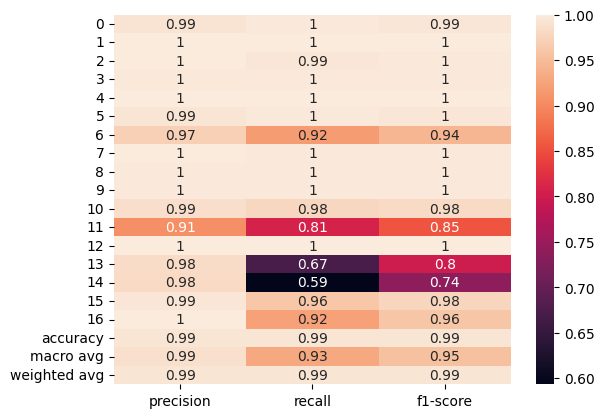

In [51]:
rfc=RandomForestClassifier(  criterion = 'entropy', max_depth =  40, n_estimators = 300)
rfc.fit(X_train, y_train)
rf_results_9 = eval_metrics(rfc, X_test , y_test,  attacks_19, "Confusion Matrix: 17 class RF")

## Write results

### 9_class

In [68]:
attacks_9 = ["Normal", "Reconnaissance" , "Weaponization", "Exploitation", "Lateral Movement", "Comand and Control" , "Exfiltration", 
               "Tampering", "Crypto-ransomware", "RDOS"]

classification_results_9 = [results_9_dt, results_9_knn,results_9_lr,results_9_svm,results_9_nb]

models_labels = ["DT", "KNN", "LR", "SVM", "NB" ]

results_9 = f1_results(attacks_9, classification_results_9, models_labels)
results_9.to_csv("results/9_class_all_components.csv")

['DT', 'KNN', 'LR', 'SVM', 'NB']
['Normal', 0.9901615175636231]
['Normal', 0.9901615175636231, 0.982386170852357]
['Normal', 0.9901615175636231, 0.982386170852357, 0.9817693363522249]
['Normal', 0.9901615175636231, 0.982386170852357, 0.9817693363522249, 0.9811721620320919]
['Normal', 0.9901615175636231, 0.982386170852357, 0.9817693363522249, 0.9811721620320919, 0.7373530839499272]
['Reconnaissance', 0.9762486560453524]
['Reconnaissance', 0.9762486560453524, 0.9755878622304616]
['Reconnaissance', 0.9762486560453524, 0.9755878622304616, 0.9434070551581364]
['Reconnaissance', 0.9762486560453524, 0.9755878622304616, 0.9434070551581364, 0.9413833289035186]
['Reconnaissance', 0.9762486560453524, 0.9755878622304616, 0.9434070551581364, 0.9413833289035186, 0.6060655782536167]
['Weaponization', 0.9985137846473955]
['Weaponization', 0.9985137846473955, 0.9820271605842089]
['Weaponization', 0.9985137846473955, 0.9820271605842089, 0.9892362135063404]
['Weaponization', 0.9985137846473955, 0.9820271

In [57]:
new_file_19 = add_f1_scores("results/XIIOTID/data_10_class.csv", attacks_9, [xgb_results_9, rf_results_9], ["XGB", "RF"])
new_file_19.to_csv("results/XIIOTID/9_class_all_components.csv")

['XGB', 'RF']
['Normal', 0.9934345676819701]
['Normal', 0.9934345676819701, 0.9941249629848978]
['Reconnaissance', 0.9838974176594947]
['Reconnaissance', 0.9838974176594947, 0.9868039528966212]
['Weaponization', 0.9989964690577959]
['Weaponization', 0.9989964690577959, 0.9988473693995167]
['Exploitation', 0.9622166246851385]
['Exploitation', 0.9622166246851385, 0.9698492462311559]
['Lateral Movement', 0.9866730508339319]
['Lateral Movement', 0.9866730508339319, 0.9848884624610218]
['Comand and Control', 0.8608534322820037]
['Comand and Control', 0.8608534322820037, 0.8391866913123844]
['Exfiltration', 0.9968361581920904]
['Exfiltration', 0.9968361581920904, 0.9965015235300756]
['Tampering', 0.9892051030421982]
['Tampering', 0.9892051030421982, 0.9784102060843964]
['Crypto-ransomware', 1.0]
['Crypto-ransomware', 1.0, 0.994475138121547]
['RDOS', 0.9999115153874741]
['RDOS', 0.9999115153874741, 0.9998761215424639]
[['Normal', 0.9934345676819701, 0.9941249629848978], ['Reconnaissance', 0.9

### 19_class

In [72]:
attacks_19 = ["Normal", "RDOS" , "Scanning vulnerability", "Generic scanning", "Brute Force", "MQTT cloud broker subscription" , "Discovering Resources", 
               "Exfiltration", "Insider Malcious", "Modbus Register Reading", "False Data Injection", "Command and Control", "Dictionary",
               "TCP Relay", "Fuzzing" , "Reverse shell" , "Crypto Ransomware"]

classification_results_19 = [results_19_dt, results_19_knn,results_19_lr,results_19_svm,results_19_nb]

models_labels = ["DT", "KNN", "LR", "SVM", "NB" ]

results_19 = f1_results(attacks_19, classification_results_19, models_labels)
results_19.to_csv("results/19_class_all_components.csv")

['DT', 'KNN', 'LR', 'SVM', 'NB']
['Normal', 0.989674288025505]
['Normal', 0.989674288025505, 0.9823515056278758]
['Normal', 0.989674288025505, 0.9823515056278758, 0.9837019106483983]
['Normal', 0.989674288025505, 0.9823515056278758, 0.9837019106483983, 0.9822939820652524]
['Normal', 0.989674288025505, 0.9823515056278758, 0.9837019106483983, 0.9822939820652524, 0.628975892431983]
['RDOS', 0.9997876331716986]
['RDOS', 0.9997876331716986, 0.9992218999787791]
['RDOS', 0.9997876331716986, 0.9992218999787791, 0.9988148095735082]
['RDOS', 0.9997876331716986, 0.9992218999787791, 0.9988148095735082, 0.9992214869599065]
['RDOS', 0.9997876331716986, 0.9992218999787791, 0.9988148095735082, 0.9992214869599065, 0.9866961916310786]
['Scanning vulnerability', 0.9947980705570794]
['Scanning vulnerability', 0.9947980705570794, 0.9956591488157026]
['Scanning vulnerability', 0.9947980705570794, 0.9956591488157026, 0.9564383955527866]
['Scanning vulnerability', 0.9947980705570794, 0.9956591488157026, 0.956

In [55]:
new_file_19 = add_f1_scores("results/XIIOTID/19_class_all_components.csv", attacks_19, [xgb_results_9, rf_results_9], ["XGB", "RF"])

['XGB', 'RF']
['Normal', 0.9942776579863991]
['Normal', 0.9942776579863991, 0.9941091843440473]
['RDOS', 0.9999469054740456]
['RDOS', 0.9999469054740456, 0.9998230339067035]
['Scanning vulnerability', 0.9992901424447493]
['Scanning vulnerability', 0.9992901424447493, 0.9972498814604077]
['Generic scanning', 0.9983086260073625]
['Generic scanning', 0.9983086260073625, 0.9972180824639841]
['Brute Force', 1.0]
['Brute Force', 1.0, 1.0]
['MQTT cloud broker subscription', 0.9975581271897228]
['MQTT cloud broker subscription', 0.9975581271897228, 0.9952264771401294]
['Discovering Resources', 0.9360186936686324]
['Discovering Resources', 0.9360186936686324, 0.9435385468663339]
['Exfiltration', 0.9971722655808167]
['Exfiltration', 0.9971722655808167, 0.9981924988703118]
['Insider Malcious', 0.996422950350551]
['Insider Malcious', 0.996422950350551, 0.9979936944683291]
['Modbus Register Reading', 0.99748322147651]
['Modbus Register Reading', 0.99748322147651, 0.998320738874895]
['False Data Inj

In [56]:
new_file_19 = add_f1_scores("results/XIIOTID/19_class_all_components.csv", attacks_19, [xgb_results_9, rf_results_9], ["XGB", "RF"])
new_file_19

['XGB', 'RF']
['Normal', 0.9942776579863991]
['Normal', 0.9942776579863991, 0.9941091843440473]
['RDOS', 0.9999469054740456]
['RDOS', 0.9999469054740456, 0.9998230339067035]
['Scanning vulnerability', 0.9992901424447493]
['Scanning vulnerability', 0.9992901424447493, 0.9972498814604077]
['Generic scanning', 0.9983086260073625]
['Generic scanning', 0.9983086260073625, 0.9972180824639841]
['Brute Force', 1.0]
['Brute Force', 1.0, 1.0]
['MQTT cloud broker subscription', 0.9975581271897228]
['MQTT cloud broker subscription', 0.9975581271897228, 0.9952264771401294]
['Discovering Resources', 0.9360186936686324]
['Discovering Resources', 0.9360186936686324, 0.9435385468663339]
['Exfiltration', 0.9971722655808167]
['Exfiltration', 0.9971722655808167, 0.9981924988703118]
['Insider Malcious', 0.996422950350551]
['Insider Malcious', 0.996422950350551, 0.9979936944683291]
['Modbus Register Reading', 0.99748322147651]
['Modbus Register Reading', 0.99748322147651, 0.998320738874895]
['False Data Inj

,Unnamed: 0,0,DT,KNN,LR,SVM,NB,XGB,RF
0,0,Normal,0.989674,0.982352,0.983702,0.982294,0.628976,0.994278,0.994109
1,1,RDOS,0.999788,0.999222,0.998815,0.999221,0.986696,0.999947,0.999823
2,2,Scanning vulnerability,0.994798,0.995659,0.956438,0.957292,0.519007,0.999290,0.997250
3,3,Generic scanning,0.996122,0.996378,0.956001,0.960803,0.777498,0.998309,0.997218
4,4,Brute Force,0.999683,0.997677,0.998046,0.997245,0.852984,1.000000,1.000000
5,5,MQTT cloud broker subscription,0.990563,0.972106,0.990547,0.992370,0.848563,0.997558,0.995226
6,6,Discovering Resources,0.902965,0.903171,0.743023,0.716981,0.234817,0.936019,0.943539
7,7,Exfiltration,0.993679,0.961669,0.991426,0.990431,0.894863,0.997172,0.998192
8,8,Insider Malcious,0.994989,0.942950,0.989525,0.993993,0.892175,0.996423,0.997994
9,9,Modbus Register Reading,0.997485,0.970690,0.998322,0.973770,0.945353,0.997483,0.998321


In [57]:
new_file_19.to_csv("results/XIIOTID/19_class_all_components.csv")